# HR Analytics Project- Understanding the Attrition in HR

#### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.


#### Attrition affecting Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

The dataset contains both dependent and independent variables, and also contains both categorical and numerical data. Attrition is the target variable and it has two classes, hence it will be a classification problem.

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [6]:
df.sample(3)

Age Attrition BusinessTravel  DailyRate              Department  \
609    43        No  Travel_Rarely        589  Research & Development   
132    31       Yes  Travel_Rarely        542                   Sales   
1467   27        No  Travel_Rarely        155  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
609                 14          2  Life Sciences              1   
132                 20          3  Life Sciences              1   
1467                 4          3  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
609              843  ...                         3            80   
132              175  ...                         3            80   
1467            2064  ...                         2            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
609                  1                 22                      3   
132                  1                  4                      2   
1467                 1                  6                      0   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
609                3               4                  1   
132                3               2                  2   
1467               3               6                  2   

      YearsSinceLastPromotion  YearsWithCurrManager  
609                         1                     0  
132                         2                     2  
1467                        0                     3  

[3 rows x 35 columns]

# Exploratory Data Analysis (EDA)

In [7]:
#checking the shape of the dataset
df.shape

(1470, 35)

We have 1470 rows and 35 columns

In [8]:
#checking the type of the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The dataset contains object and integer datatype. The object datatype shall be encoded for the model building

In [9]:
#checking the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [10]:
#checking the unique values of each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

The, EmployeeCount, Over18 and StandardHours have only 1 count so they can be dropped as they will not make much impact in our model. Also Employee Number is taken on the basis of unique ID of the employees which does not helps so we can drop this too.

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that there is no null values in the dataset

<AxesSubplot:>

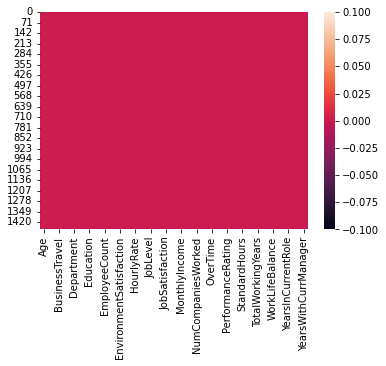

In [13]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

Visualtization also clearly shows that there is no null values in the dataset

In [14]:
#checking the number of columns in the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
#checking the uniqueness of the target variable
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

There are two unique values in the label 'Yes' and 'No'. We can say Yes means the employess who are facing attrition and No means employees who are not facing any attrition.

In [16]:
# Checking count of number of employees who stayed and left the company
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Since the Yes count is less we will have to use SMOTE method to equate both the counts of the categories so that there is no bias present during machine learning.

### Statistical Summary

In [17]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same which means there are no missing values present in the data. The mean is more than the median(50%) in most of the columns which means they are skewed to right. The min age of the employee is 18 and max is 60 and most of the employees are in between 36. In few columns the median(50%) is more than the mean which means they are skewed to left. By summarising the data above we can infer that DailyRate has a huge outliers from the maximum of 1499 which is quite far from the 75% percentile. These differences we can also be seen in Age, DistanceFromHome, HourlyRate, MonthlyIncome, TotalWorkingYears, YearsAtCompany and many other. Some of the columns have huge difference in mean and the standard deviation.

### Dropping Columns

In [18]:
# Dropping irrelevant columns
df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)

I am dropping all the unwanted columns after careful observations done above.

- EmployeeCount - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee
- EmployeeNumber - Since it is just a unique number provided to each employee that has nothing to do with attrition
- Over18 - As per child labour law any person below the age of 18 is not eligible for employement in India and also this particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees
- StandardHours - Again in this column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition as there is no partiality in these terms on any employee

In [19]:
df.shape

(1470, 31)

In [22]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


Here we have a list of all the 8 columns that hold object datatype that will need to be encoded into numerical format before creating our classification model.

In [23]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Here we have a list of all the 23 columns that hold integer datatype that will comprise the numerical data part of our ML project.

# Data Visualization

### Univariate Analysis

### Visualizing the Categorical Columns

No     1233
Yes     237
Name: Attrition, dtype: int64


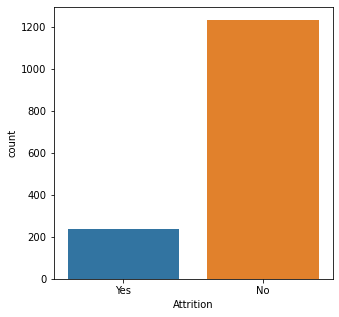

In [24]:
#Visualize the number of employes who stayed and left the company
print(df["Attrition"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Attrition"])
plt.show()

We can clearly observe that the Attrition count "no" is higher then "yes", which also means that the data is imbalanced, hence we will be required to balance the data

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


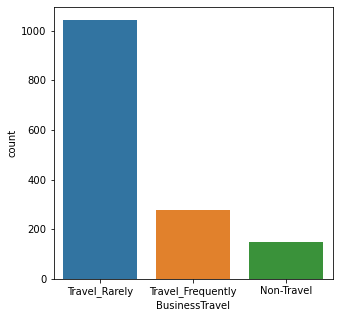

In [25]:
#Visualize the count of employees on the basis of BusinessTravel
print(df["BusinessTravel"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["BusinessTravel"])
plt.show()

This plot clearly shows that most of the employees travel rarely and few employees travel frequently.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


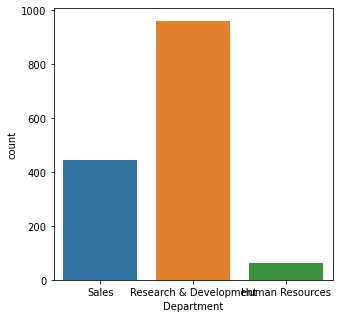

In [26]:
#Visualizing count of Department where the employees are working
print(df["Department"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Department"])
plt.show()

This plot clearly shows the employees who works in different department. Most of the employees belongs to Research & Development Department and only few employees of count 446 are working in the Sales department and remaining 63 employees works in HR department.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


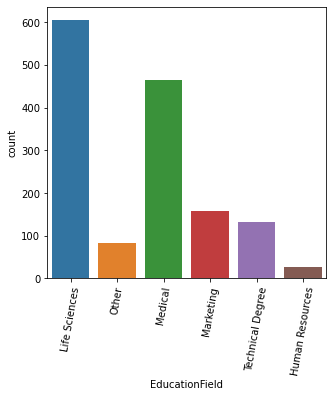

In [27]:
#Visualizing count of Educational fied of the employees
print(df["EducationField"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["EducationField"])
plt.xticks(rotation=80)
plt.show()

We can observe that each and every employees are from different educational field. Here most of the employees are from Life Sciences backgound followed by Medical field and only few employees are from Human Resources field.

Male      882
Female    588
Name: Gender, dtype: int64


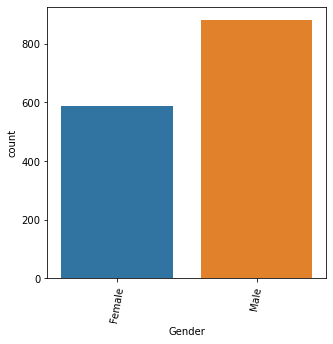

In [28]:
#Visualize the count of Gender
print(df['Gender'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["Gender"])
plt.xticks(rotation=80)
plt.show()

It can be observed that male employees are comparitively higher than female employees

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


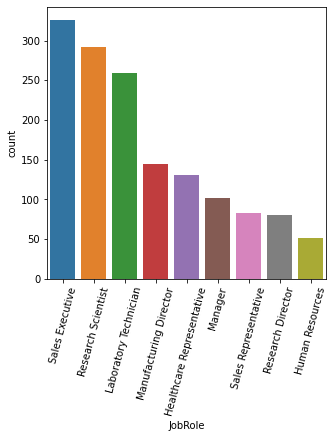

In [29]:
#Visualizing count of JobRole of the employees
print(df["JobRole"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["JobRole"])
plt.xticks(rotation=75)
plt.show()

In the company there are different jobroles here, Sales Executive jobs are more followed by Research Scientist and Laboratory Technician. Human Resources jobroles are very less in numbers.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


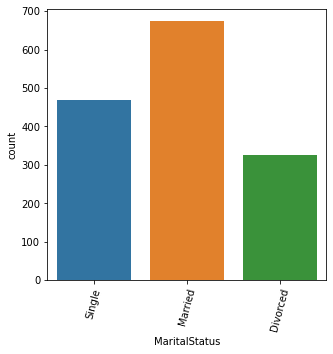

In [30]:
#Visualize the count of marital status of the employees
print(df["MaritalStatus"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df["MaritalStatus"])
plt.xticks(rotation=75)
plt.show()

It can be seen that married employee count is higher in number

No     1054
Yes     416
Name: OverTime, dtype: int64


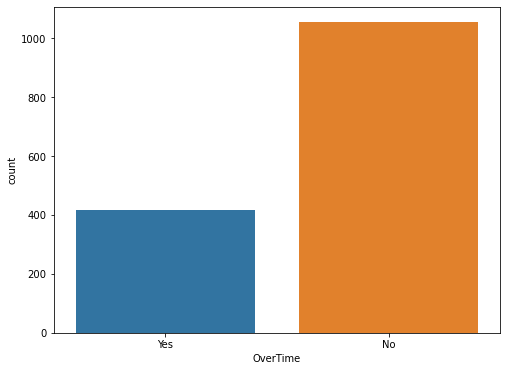

In [31]:
#Visualizing count of Overtime of the employees
print(df["OverTime"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["OverTime"])
plt.show()

The employees who do not work overtime is high in counts as there are 1054 employees who works within the given time and only 416 employees work more than the assigned time.

## Bivariate Analysis

Text(0.5, 1.0, 'Comparision between Attrition and Age')

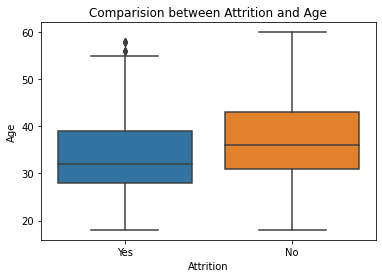

In [32]:
#checking the relation between 'Age' and 'Attrition'
sns.boxplot(df['Attrition'],df['Age'])
plt.title('Comparision between Attrition and Age')

We can observe that the attrition is low with higher age group

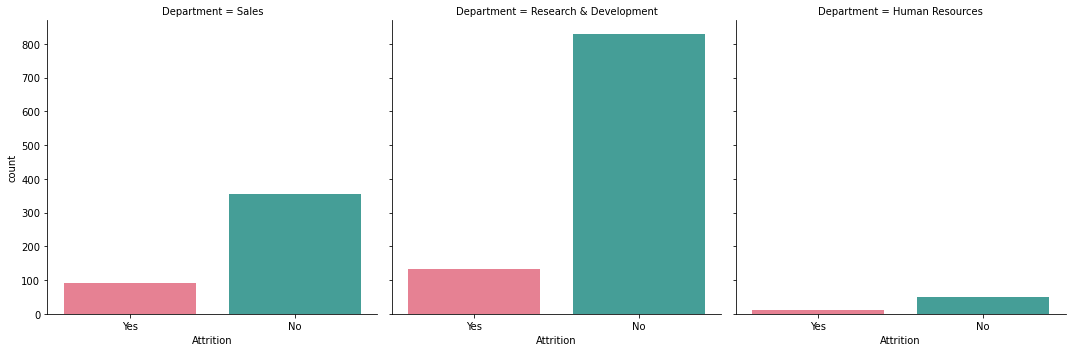

In [33]:
#checking the relation between 'Attrition' and 'Department'
sns.catplot(x='Attrition',col='Department',data=df,kind='count',palette="husl")

From the above plot we can see that the attrition level in R&D department is higher in comparision to other departments.

#### Violin Plot

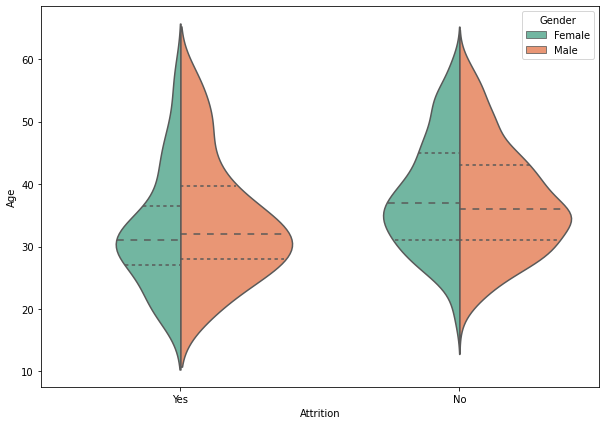

In [34]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we see that the Attrition counts both in male and female are high when they are in their mid 20's and 30's of age.

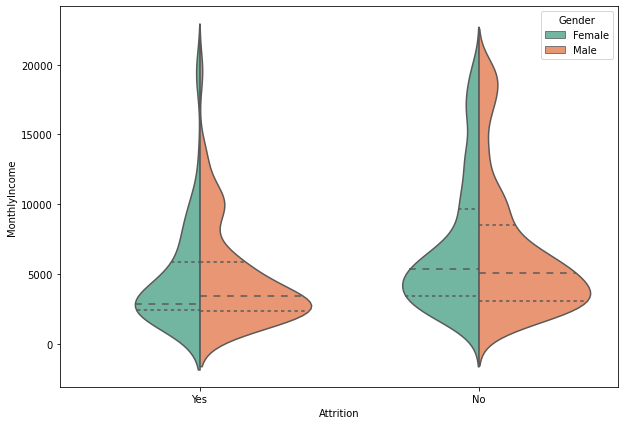

In [35]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we can see that the Attrition peaks for both male and female employees when the monthly income is less than 5000.

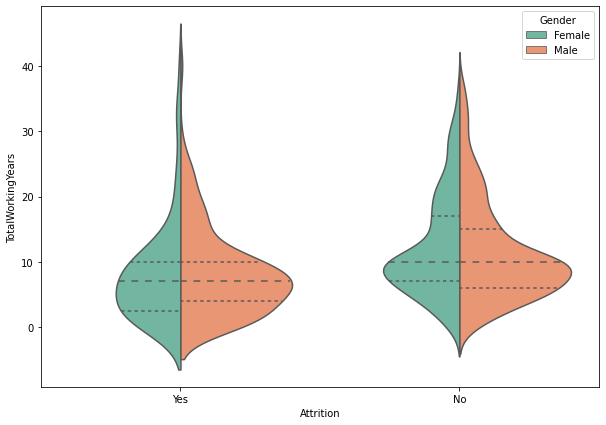

In [36]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we notice that the Attrition for both male and female employees occur when they are in their experience range of 1-10 years.

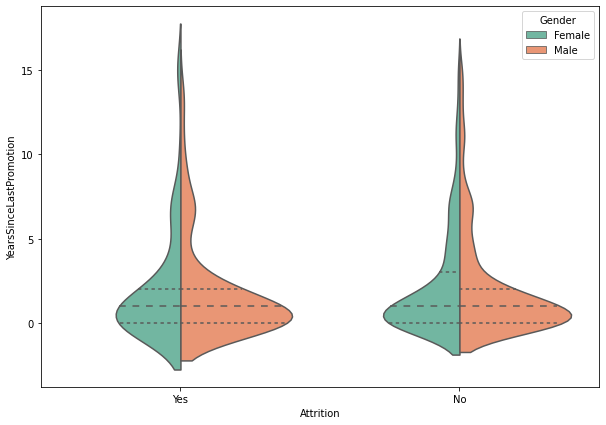

In [37]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we see that the Attrition for both male and female employees happen when they do not see promotions happening after years of gaining experience.

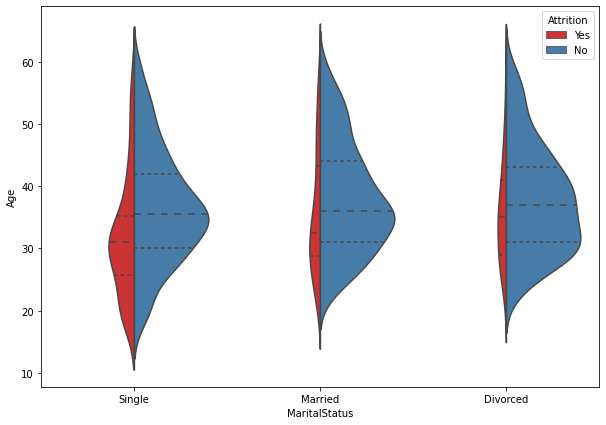

In [38]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we can see that the Attrition rate is quite less in employees when they are married or divorced as compared to when they are single and have lesser responsibilities to deal with at their age.

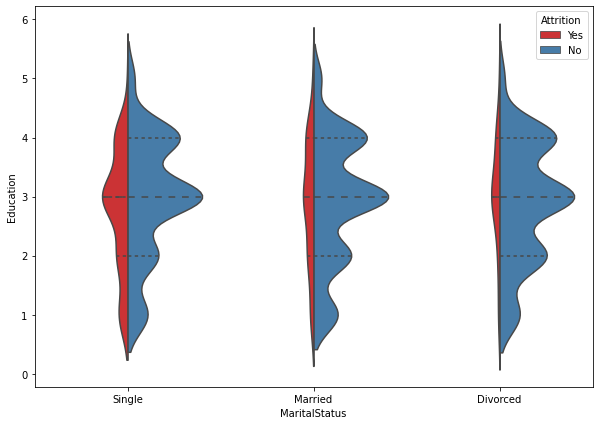

In [39]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we notice that once again employees who are married or divorced and with good education choose stability in life rather than the one's who are single and are okay to take risks and oppotunities in life.

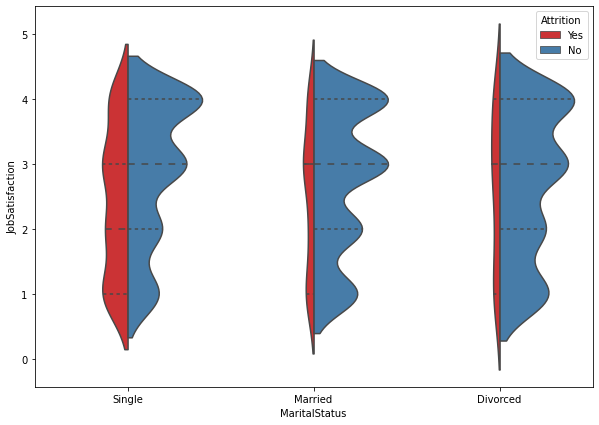

In [40]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above voilin plot we can see that the job satisfaction part for singles is not that great compared to employees who are married or divorced may be due to the year of experience difference that makes a huge gap in pay scale. But we do notice stability and lesser attrition rate amongst employees who are married or divorced.

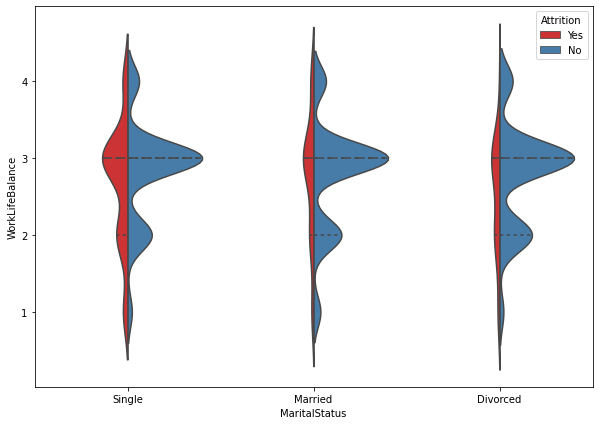

In [41]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we can see that Work Life balance maintained by singles are quite less therefore there are attritions observed as they have to achieved lots of skills to get better in their career.

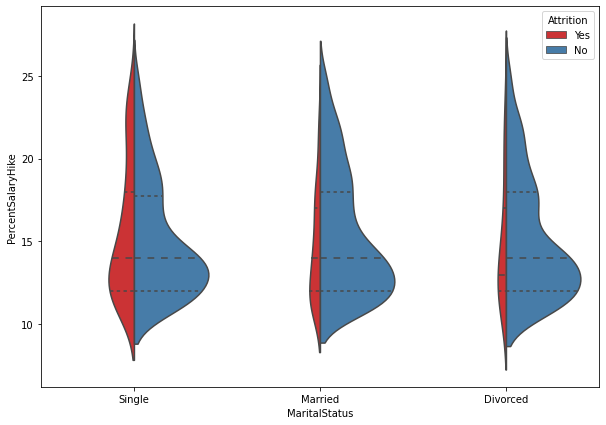

In [42]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we can see that the Percent Salary Hike plays a major role when it come to Attrition amongst the Singles as compared to their married or divorced counterparts.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


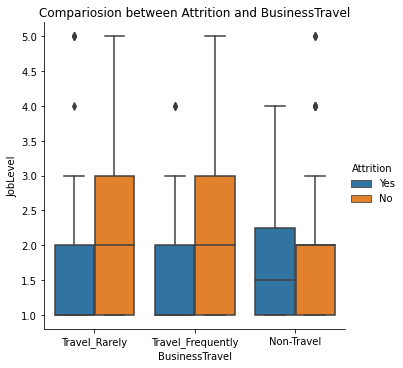

In [43]:
#checking the corelation between 'Attrition' and 'Business Level'
print(df["BusinessTravel"].value_counts())
sns.catplot(x="BusinessTravel",y='JobLevel',data=df,hue="Attrition",kind="box")
plt.title("Compariosion between Attrition and BusinessTravel")
plt.show()

The employees in joblevel 5 who travel rarely are dont want to leave the organization and the employees in the joblevel 4 with non business travel are facing attrition.

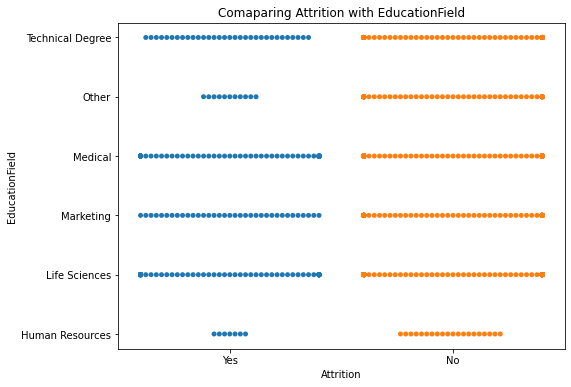

In [44]:
# Checking how the attrition perform according to the employees EducationField
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with EducationField")
sns.swarmplot(x=df['Attrition'],y=df['EducationField'],data=df)
plt.show()

Most of the employees are from Life Sciences background followed by Marketing and Medical. Only few employees in the HR and Other education level have left the company and most of the people stayed still.

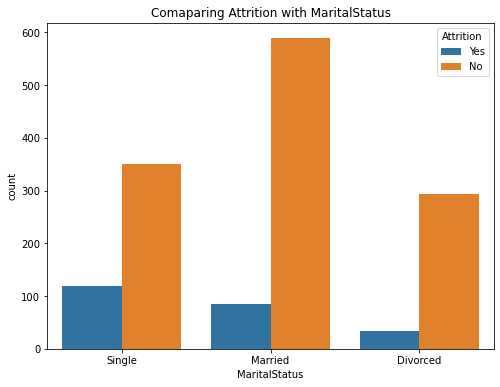

In [45]:
# Checking the relation between 'Attrition' and 'Maritial Status'
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with MaritalStatus")
sns.countplot(x=df['MaritalStatus'],hue=df["Attrition"],data=df)
plt.show()

It can be seen that the attrition rate is high in singles followed by Married employees. it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is weak predictor of attrition.

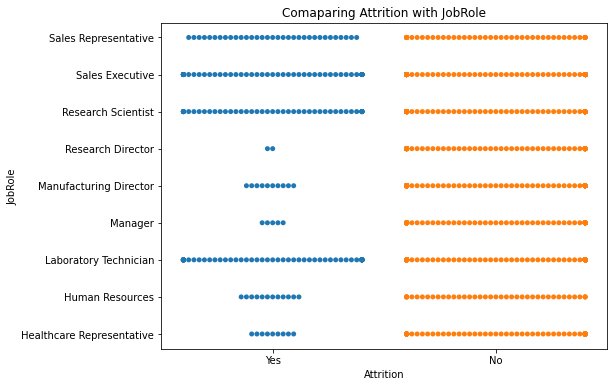

In [46]:
#checking the corelation between the JobRole and Attrition
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with JobRole")
sns.swarmplot(x=df['Attrition'],y=df['JobRole'])
plt.show()

The highest attrition is from the Laboratory Technician, Sales Representatives, Sales Executive and Research Scientist.

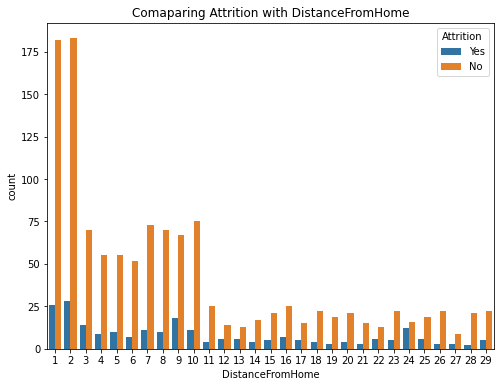

In [47]:
#Checking the corelation between 'Attrition' and travel distance
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with DistanceFromHome")
sns.countplot(x=df['DistanceFromHome'],hue=df["Attrition"],data=df)
plt.show()

It can be clearly observed from the plot that highest employees stays near to the workplace. The Attrition level is higher here.

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


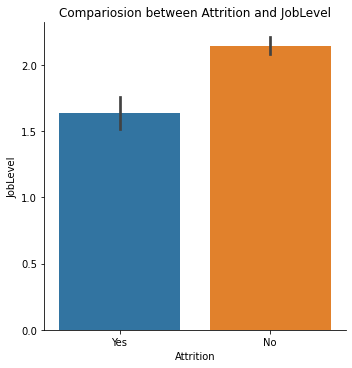

In [48]:
# Chcking attribution in each joblevel
print(df["JobLevel"].value_counts())
sns.catplot(x="Attrition",y='JobLevel',data=df,kind="bar")
plt.title("Compariosion between Attrition and JobLevel")
plt.show()

Most of the employees in joblevel 4 have high percent of "No" attrition and very less percent for attrition "Yes". Which means most of the employees don't want to leave the company.

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


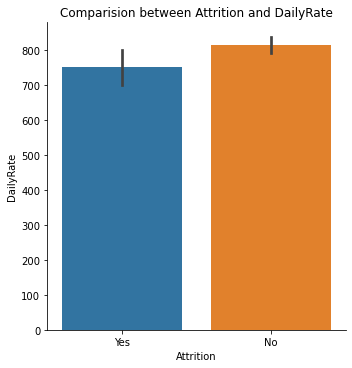

In [49]:
# Checking attrition level in Dailyrate
print(df["DailyRate"].value_counts())
sns.catplot(x="Attrition",y='DailyRate',data=df,kind="bar")
plt.title("Comparision between Attrition and DailyRate")
plt.show()

Employees working with lower daily rate wants to leave the organization compared to employees working with higher dailyrate.

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


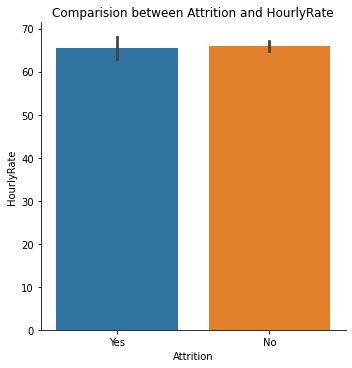

In [50]:
# Checking attrition level in HourlyRate
print(df["DailyRate"].value_counts())
sns.catplot(x="Attrition",y='HourlyRate',data=df,kind="bar")
plt.title("Comparision between Attrition and HourlyRate")
plt.show()

Attrition and HourlyRate equal which means there is no significant difference in attrition and hourlyrate, so hourlyrate wont affect the attrition.

4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: MonthlyRate, Length: 1427, dtype: int64


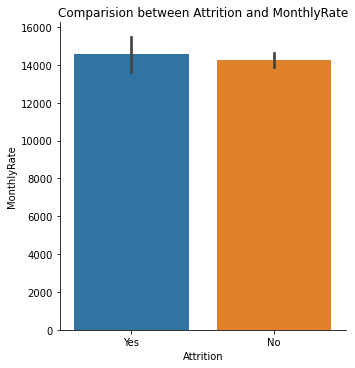

In [51]:
# Checking attrition level in Monthlyrate
print(df["MonthlyRate"].value_counts())
sns.catplot(x="Attrition",y='MonthlyRate',data=df,kind="bar")
plt.title("Comparision between Attrition and MonthlyRate")
plt.show()

MonthlyRate for "Yes" is bit higher than "No" attrition.

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64


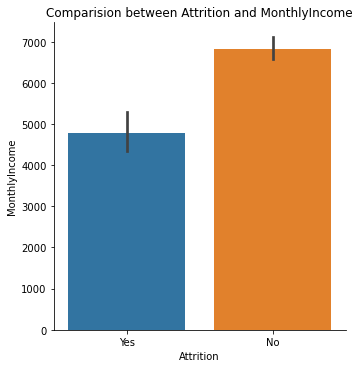

In [52]:
# Checking attrition level in Monthlyincome
print(df["MonthlyIncome"].value_counts())
sns.catplot(x="Attrition",y='MonthlyIncome',data=df,kind="bar")
plt.title("Comparision between Attrition and MonthlyIncome")
plt.show()

MonthlyIncome for "No" attrition is quite high than the "Yes" attrition and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


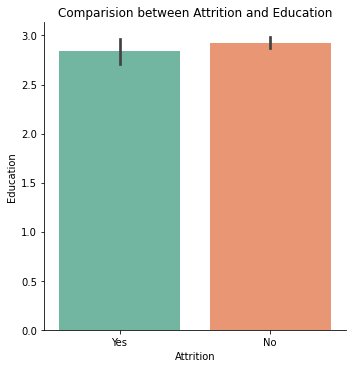

In [63]:
# Checking how attrition effects the education of employees 
print(df["Education"].value_counts())
sns.catplot(x="Attrition",y='Education',data=df, kind="bar",palette="Set2")
plt.title("Comparision between Attrition and Education")
plt.show()

It is likely that the employees education for "Yes" attrition is less than "No" which means low educated employees facing attrition

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


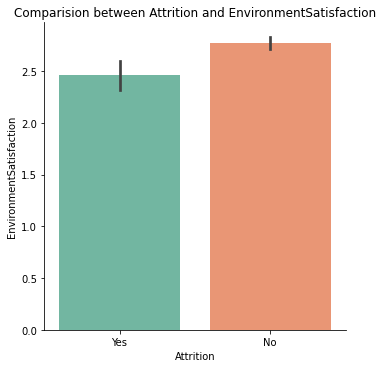

In [58]:
# Checking the counts of EnvironmentSatisfaction
print(df["EnvironmentSatisfaction"].value_counts())
sns.catplot(x='Attrition',y='EnvironmentSatisfaction',data=df, kind="bar",palette="Set2")
plt.title("Comparision between Attrition and EnvironmentSatisfaction")
plt.show()

We can notice that the relative percent of "No" attrition in employees with high EnvironmentSatisfaction in the above plot. Which means the employees having low EnvironmentSatisfaction wants to leave the company.

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


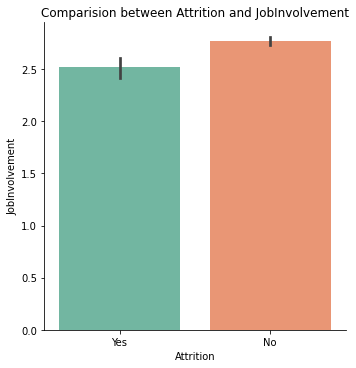

In [59]:
# Checking the counts of JobInvolvement
print(df["JobInvolvement"].value_counts())
sns.catplot(x='Attrition',y='JobInvolvement',data=df, kind="bar",palette="Set2")
plt.title("Comparision between Attrition and JobInvolvement")
plt.show()

From the graph we can notice that the employees in low Jobinvolvement levels wants to leave the organization.

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


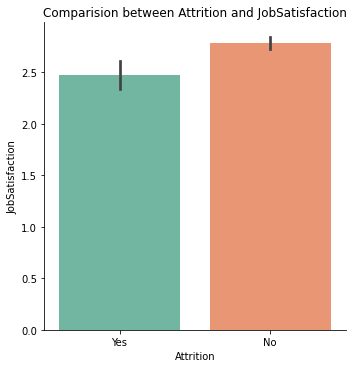

In [60]:
# Checking the counts of JobSatisfaction
print(df["JobSatisfaction"].value_counts())
sns.catplot(x='Attrition',y='JobSatisfaction',data=df, kind="bar",palette="Set2")
plt.title("Comparision between Attrition and JobSatisfaction")
plt.show()

The JobSatisfaction of employees for "Yes" attrition is less, it is obvious that the employees with low JobSatisfaction wants to leave the organization.

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


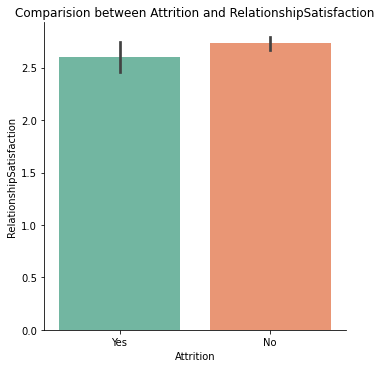

In [62]:
# Checking the counts of RelationshipSatisfaction
print(df["RelationshipSatisfaction"].value_counts())
sns.catplot(x='Attrition',y='RelationshipSatisfaction',data=df, kind="bar",palette="Set2")
plt.title("Comparision between Attrition and RelationshipSatisfaction")
plt.show()

The employees having high RelationshipSatisfaction are facing the attrition.

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


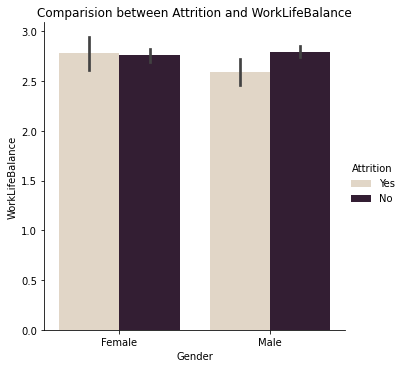

In [64]:
# Checking attrition level in WorkLifeBalance
print(df["WorkLifeBalance"].value_counts())
sns.catplot(x='Gender',y='WorkLifeBalance',data=df,kind="bar",hue='Attrition',palette="ch:.25")
plt.title("Comparision between Attrition and WorkLifeBalance")
plt.show()

The female employees with bad WorkLifeBalance facing more attrition compare to male employees. There are more employees in WorkLifeBalance level 2 and 3.

<AxesSubplot:xlabel='Gender', ylabel='YearsAtCompany'>

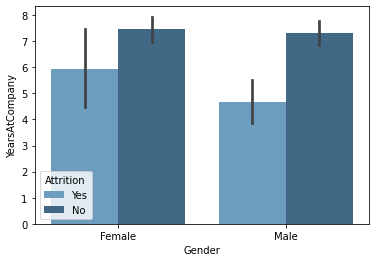

In [65]:
# Checking attrition level in YearsAtCompany
sns.barplot(x='Gender',y='YearsAtCompany',data=df,hue='Attrition',palette="Blues_d")

<AxesSubplot:xlabel='Gender', ylabel='TotalWorkingYears'>

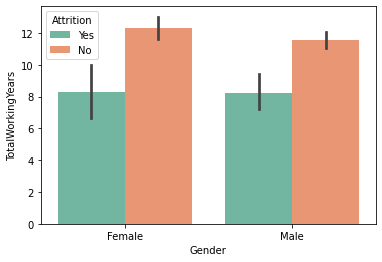

In [66]:
# Checking attrition level in TotalWorkingYears
sns.barplot(x='Gender',y='TotalWorkingYears',data=df,hue='Attrition',palette="Set2")

<AxesSubplot:xlabel='Gender', ylabel='YearsInCurrentRole'>

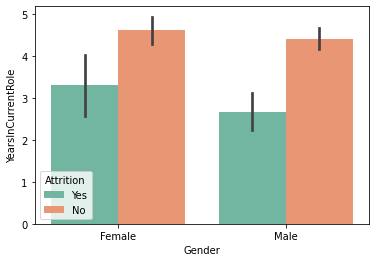

In [67]:
# Checking attrition level in YearsInCurrentRole
sns.barplot(x='Gender',y='YearsInCurrentRole',data=df,hue='Attrition',palette="Set2")

<AxesSubplot:xlabel='Gender', ylabel='YearsSinceLastPromotion'>

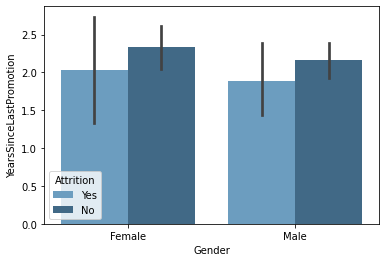

In [68]:
# Checking attrition level in YearsSinceLastPromotion
sns.barplot(x='Gender',y='YearsSinceLastPromotion',data=df,hue='Attrition',palette="Blues_d")

Female employees are spending more years at company but the "Yes" attrition for female employees are more than male. As same as above the Total Working Years of female employees is more than the male employees and the "Yes" attrition for male and female employees are same. Here also the female employees spending more years in the current organization compared to male employees and also they are facing attrition. The female employees spend more years since their last promotion than male. From the above observation we can say that the spending years of female employees is more than male and the wants to quit the organization.

3    1244
4     226
Name: PerformanceRating, dtype: int64


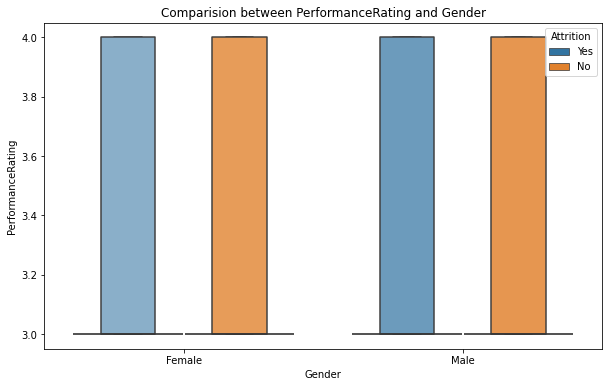

In [69]:
# Let's check how the performance rating afecting the attrition level
print(df["PerformanceRating"].value_counts())
plt.figure(figsize=(10,6))
sns.boxenplot(df['Gender'],df['PerformanceRating'],data=df,hue=df['Attrition'])
plt.title("Comparision between PerformanceRating and Gender")
plt.show()

As we can see there is no significant difference in PerformanceRating between male amd female and the attrition also affecting them equally.

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64
3    1244
4     226
Name: PerformanceRating, dtype: int64
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


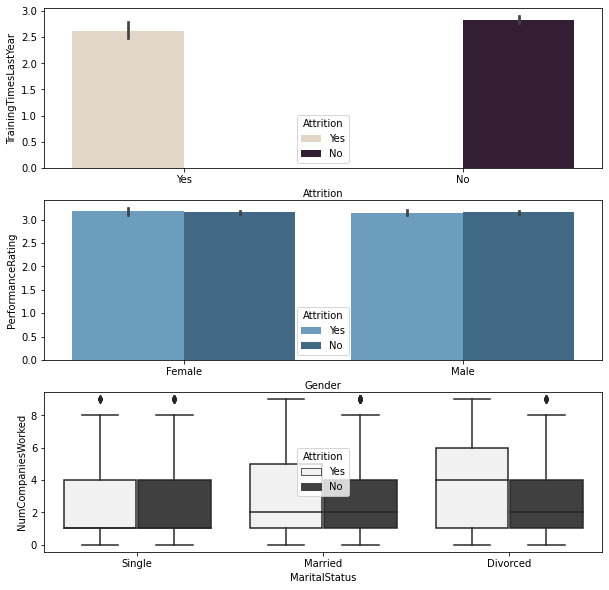

In [71]:
print(df["TrainingTimesLastYear"].value_counts())
print(df["PerformanceRating"].value_counts())
print(df["NumCompaniesWorked"].value_counts())

fig,axes=plt.subplots(3,1,figsize=(10,10))

# Checking attrition level in TrainingTimesLastYear
sns.barplot(x='Attrition',y='TrainingTimesLastYear',ax=axes[0],data=df,hue='Attrition',palette="ch:.25")

# Checking attrition level in PerformanceRating
sns.barplot(x='Gender',y='PerformanceRating',ax=axes[1],data=df,hue='Attrition',palette="Blues_d")

# Checking attrition level in NumCompaniesWorked
sns.boxplot(x='MaritalStatus',y='NumCompaniesWorked',ax=axes[2],data=df,hue='Attrition',color=".25")
plt.show()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


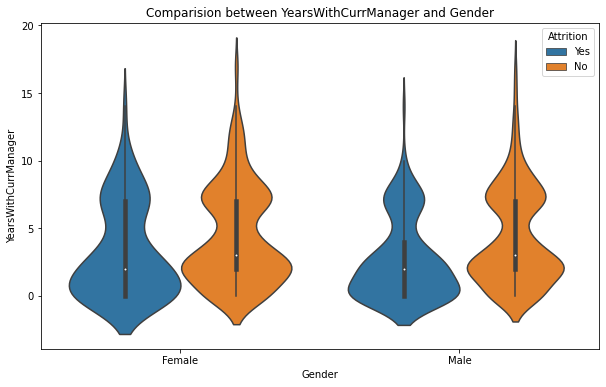

In [72]:
# Let's check how the performance rating afecting the attrition level
print(df["YearsWithCurrManager"].value_counts())
plt.figure(figsize=(10,6))
sns.violinplot(df['Gender'],df['YearsWithCurrManager'],data=df,hue=df['Attrition'])
plt.title("Comparision between YearsWithCurrManager and Gender")
plt.show()

Here we can see that the years working with current manager is zero then the attrition seems to be high in both the Gender. After 2years(say) some employees left the organization since they might not like the job.

### MultiVariate Analysis

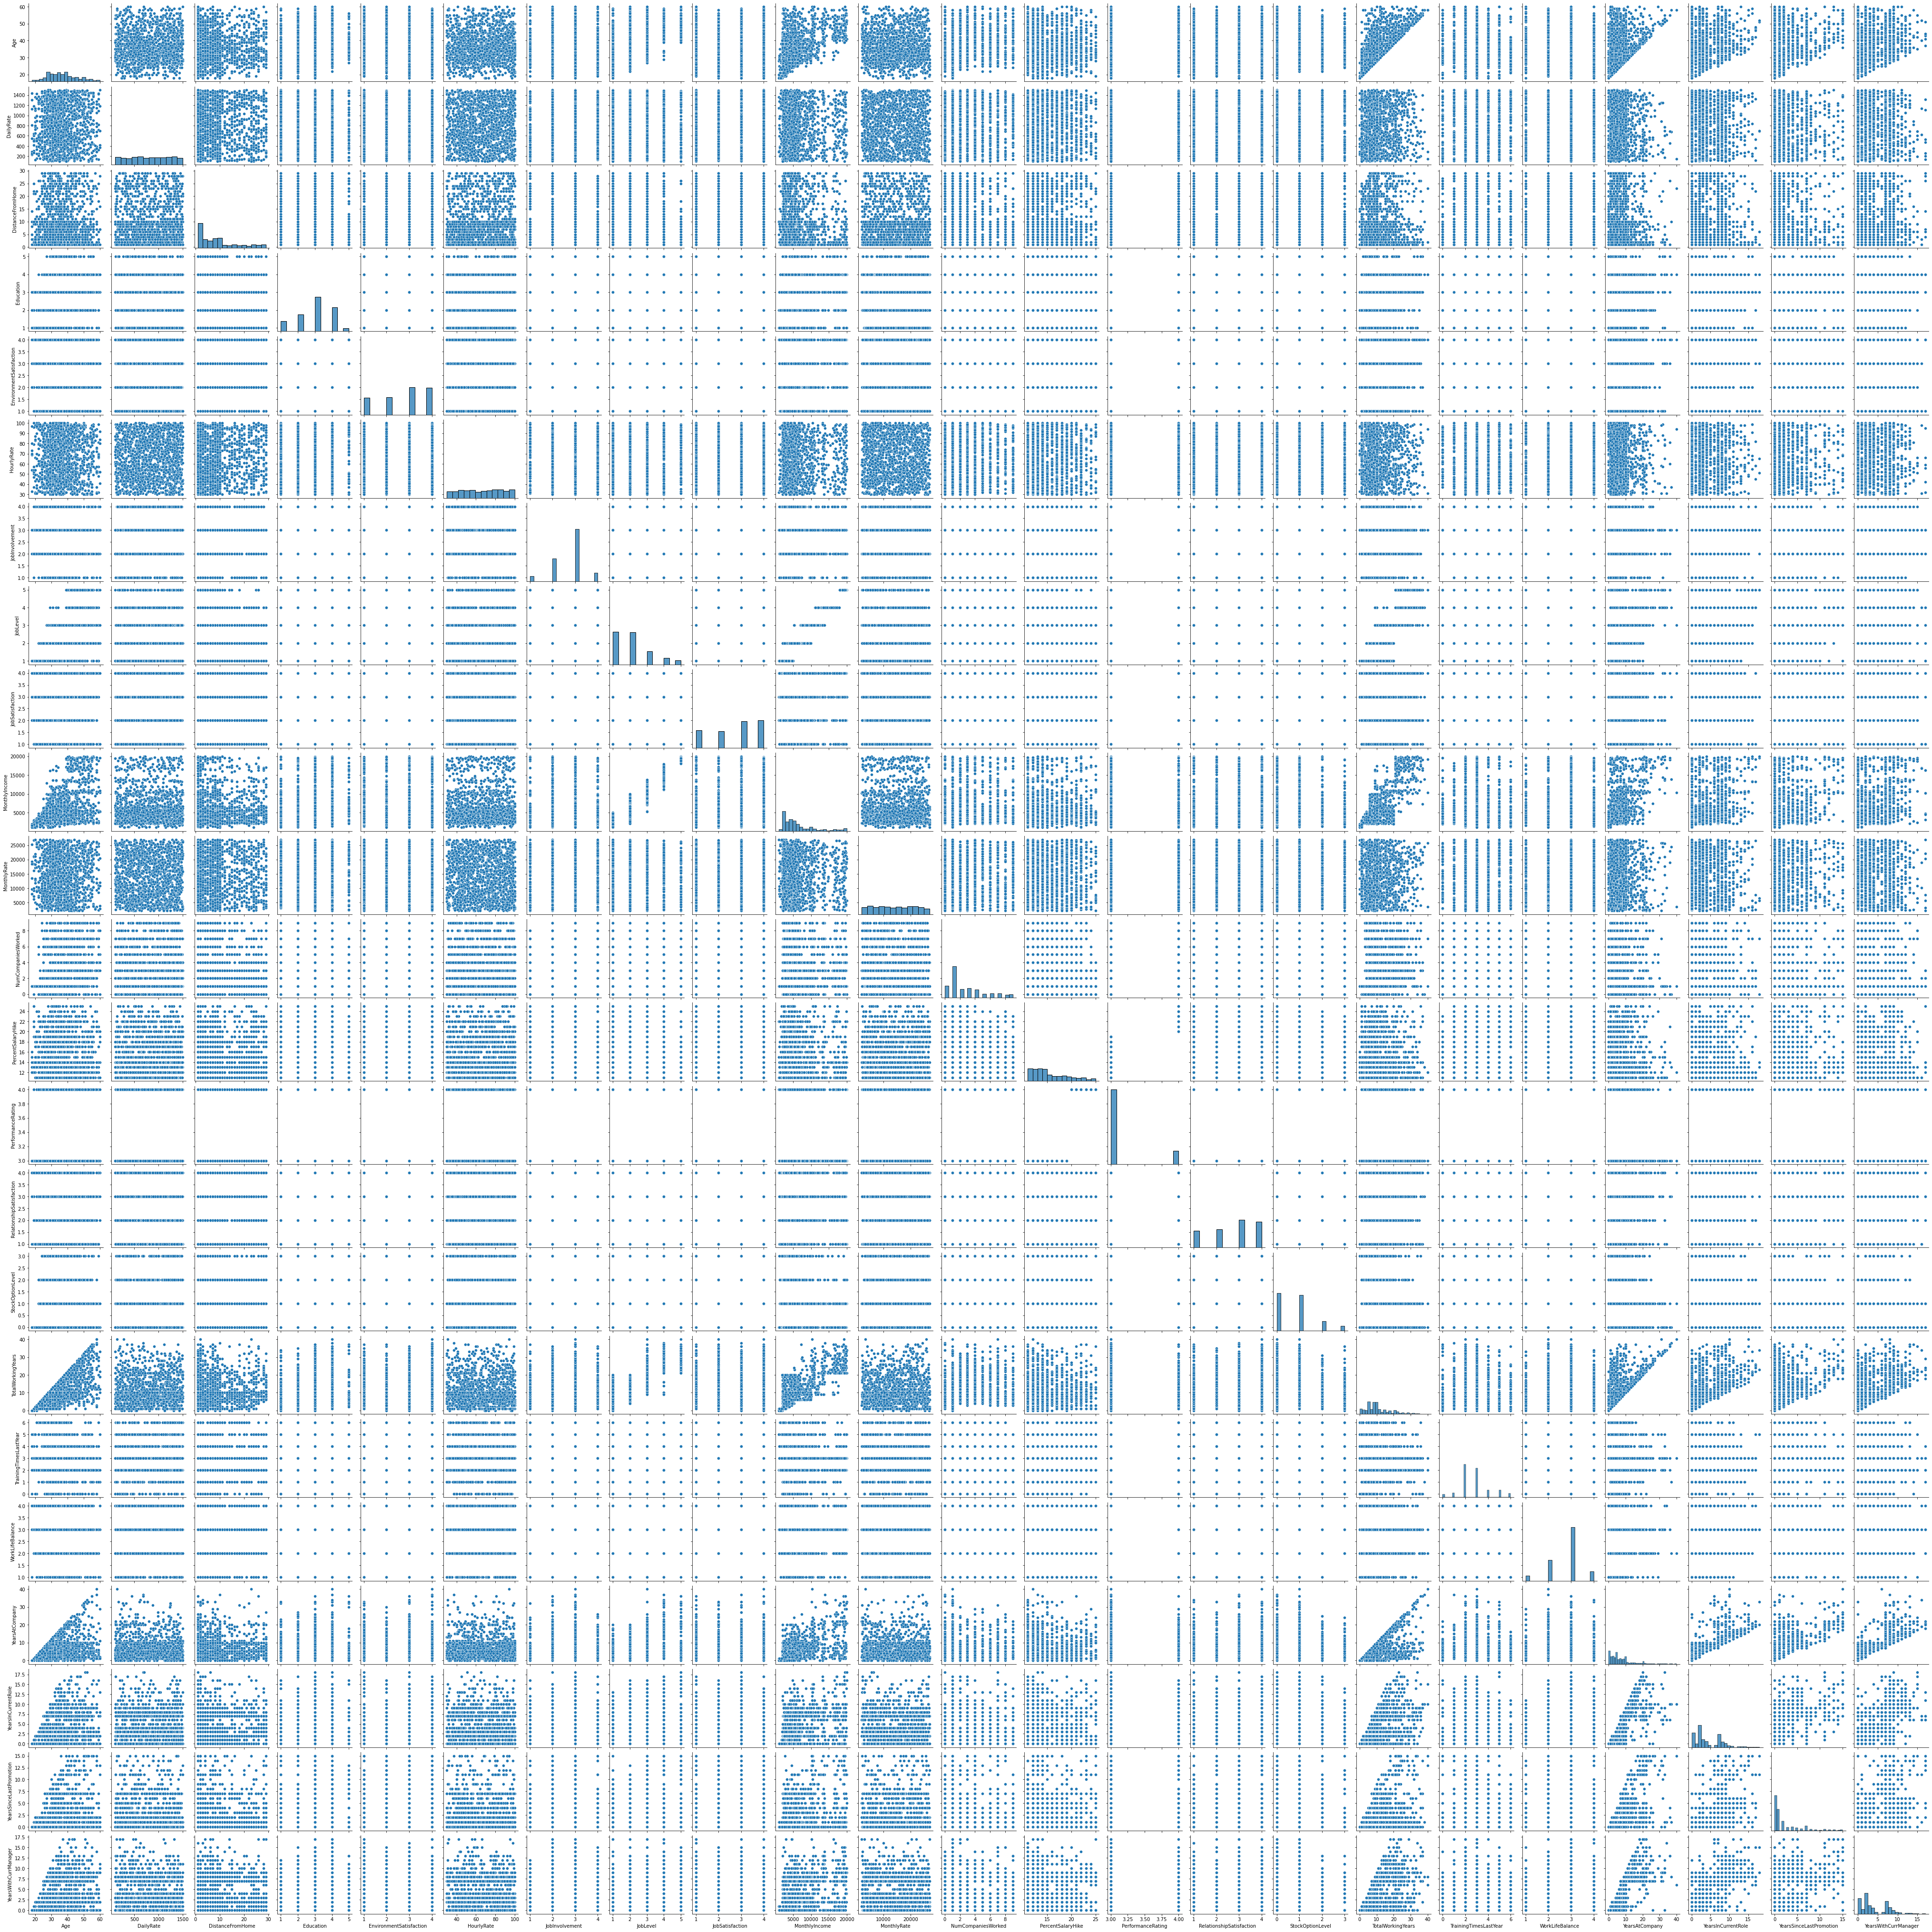

In [73]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df)

This pair plot gives the pairwise relation between the columns

## Checking Skewness

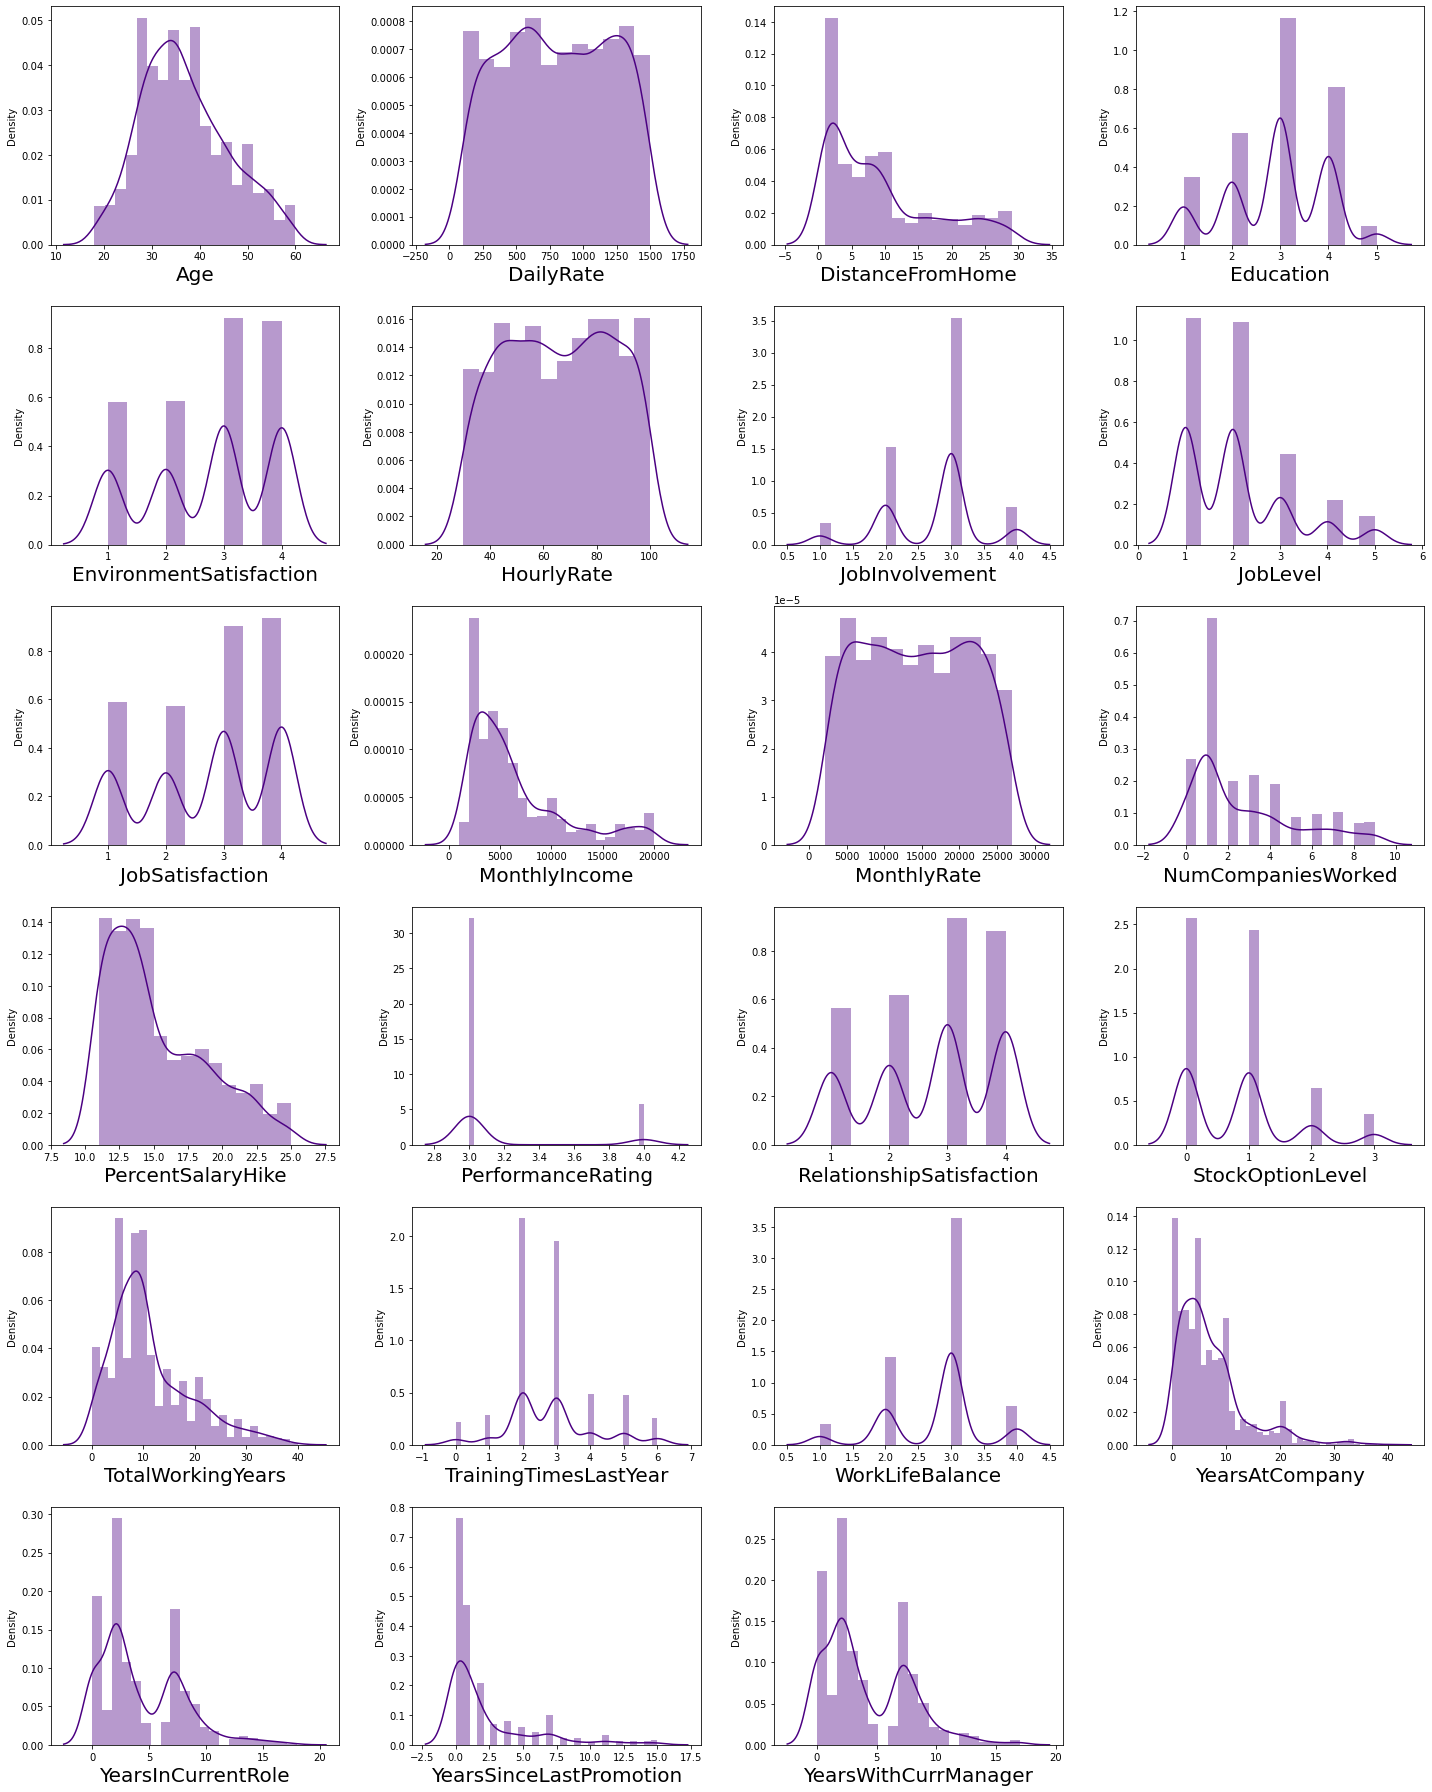

In [74]:
# Checking how the data has been distriubted in each column for numerical columns

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [75]:
df.skew().sort_values()

WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
HourlyRate                 -0.032311
DailyRate                  -0.003519
MonthlyRate                 0.018578
Age                         0.413286
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
StockOptionLevel            0.968980
JobLevel                    1.025401
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
MonthlyIncome               1.369817
YearsAtCompany              1.764529
PerformanceRating           1.921883
YearsSinceLastPromotion     1.984290
dtype: float64

From the above distribution plot we can infer that the Age column seems to be normal and there is no skewness in this column. The columns DailyRate, HourlyRate and MonthlyRate are almost normally distributed and these columns have no skewness. Apart from the above mentioned columns, none of the columns are normally distributed and all of them are skewed. We will remove these skewness later.

## Checking Outliers

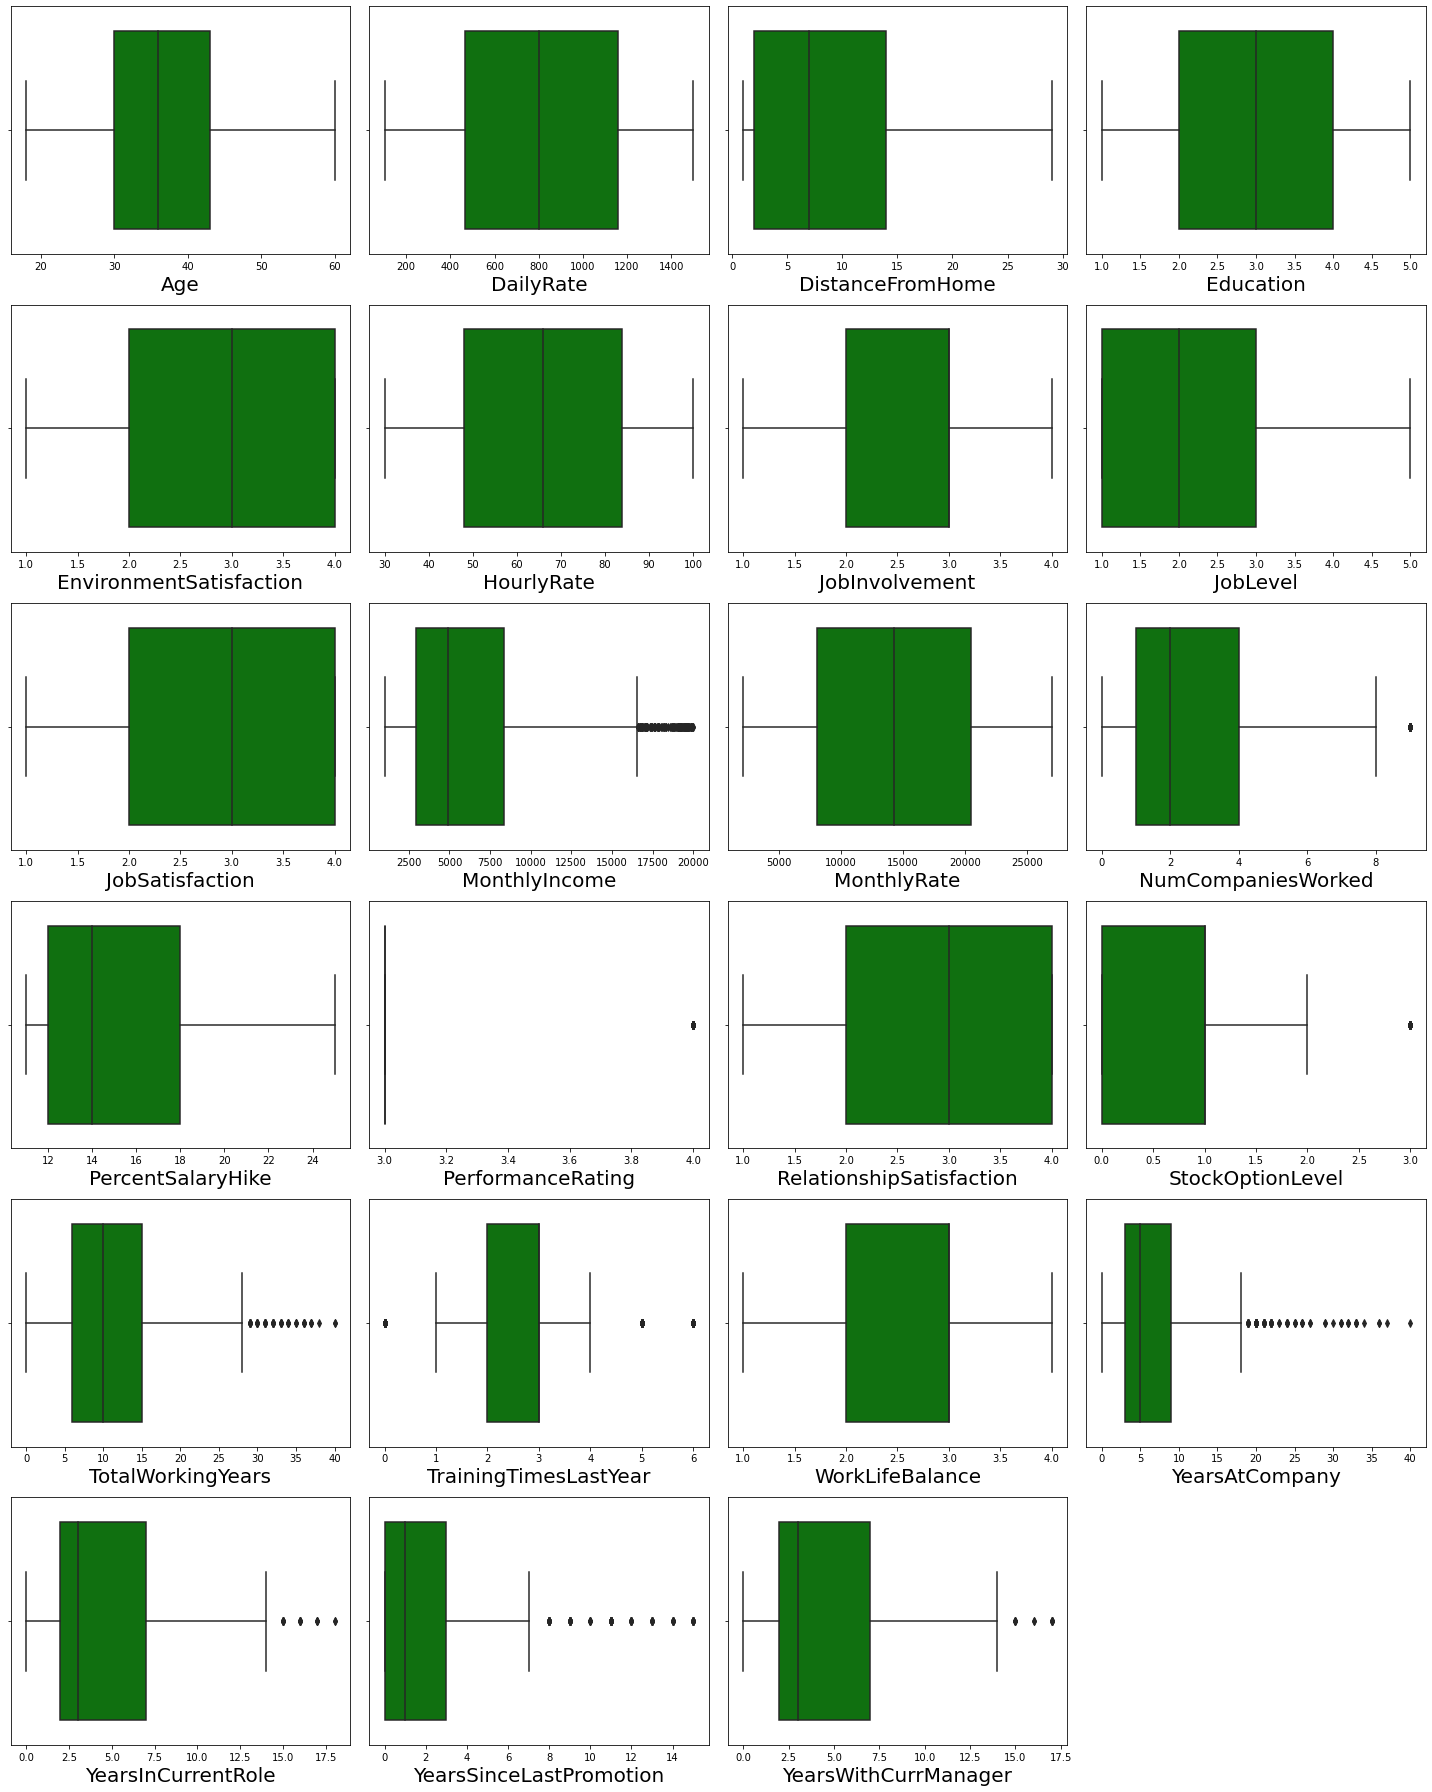

In [76]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We have created a box plot visual for all our integer datatype columns to check for outliers. We do see some of the columns where there are presence of outliers and we will need to treat it accordingly.

- MonthlyIncome
- NumCompaniesWorked
- PerformanceRating
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

All the above columns show visible outlier details.

# Data Preprocessing

In [77]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [104]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### zscore method

In [105]:
# Features containing outliers
features = df[['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [106]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

MonthlyIncome  NumCompaniesWorked  PerformanceRating  StockOptionLevel  \
0          0.108350            2.125136           0.426230          0.932014   
1          0.291719            0.678049           2.346151          0.241988   
2          0.937654            1.324226           0.426230          0.932014   
3          0.763634            0.678049           0.426230          0.932014   
4          0.644858            2.525591           0.426230          0.241988   
...             ...                 ...                ...               ...   
1465       0.835451            0.523316           0.426230          0.241988   
1466       0.741140            0.523316           0.426230          0.241988   
1467       0.076690            0.678049           2.346151          0.241988   
1468       0.236474            0.277594           0.426230          0.932014   
1469       0.445978            0.277594           0.426230          0.932014   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              0.421642               2.171982        0.164613   
1              0.164511               0.155707        0.488508   
2              0.550208               0.155707        1.144294   
3              0.421642               0.155707        0.161947   
4              0.678774               0.155707        0.817734   
...                 ...                    ...             ...   
1465           0.735447               0.155707        0.327893   
1466           0.293077               1.707500        0.001333   
1467           0.678774               2.171982        0.164613   
1468           0.735447               0.155707        0.325228   
1469           0.678774               0.155707        0.491174   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0               0.063296                 0.679146              0.245834  
1               0.764998                 0.368715              0.806541  
2               1.167687                 0.679146              1.155935  
3               0.764998                 0.252146              1.155935  
4               0.615492                 0.058285              0.595227  
...                  ...                      ...                   ...  
1465            0.615492                 0.679146              0.314873  
1466            0.764998                 0.368715              0.806541  
1467            0.615492                 0.679146              0.314873  
1468            0.488900                 0.679146              1.086895  
1469            0.339394                 0.368715              0.595227  

[1470 rows x 10 columns]

In [107]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

New dataframe has been created after removing the outliers. Here we have removed the outliers whose Zscore is greater than 3.

In [108]:
# Shape of original dataset
df.shape

(1470, 31)

In [109]:
# Shape of new dataframe
new_df.shape

(1387, 31)

Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-3 zscore value.

## Percentage data loss:

In [125]:
loss_percent=(1470-1387)/1470*100
print(loss_percent,'%')

5.646258503401361 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

5.646% data loss is acceptable.

### df_new is the new data set after 4 columns are removed and all the outliers (with z<3 z score) are removed

## Checking for skewness

In [110]:
new_df.skew().sort_values()

WorkLifeBalance            -0.557100
JobInvolvement             -0.501401
JobSatisfaction            -0.345612
EnvironmentSatisfaction    -0.325285
RelationshipSatisfaction   -0.295686
Education                  -0.289024
HourlyRate                 -0.030481
DailyRate                  -0.017078
MonthlyRate                 0.030596
Age                         0.472280
TrainingTimesLastYear       0.577614
YearsWithCurrManager        0.694506
YearsInCurrentRole          0.726675
PercentSalaryHike           0.800592
DistanceFromHome            0.954752
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
NumCompaniesWorked          1.037715
JobLevel                    1.126075
YearsAtCompany              1.248623
MonthlyIncome               1.544770
YearsSinceLastPromotion     1.756335
PerformanceRating           1.931566
dtype: float64

The columns containing skewness more than +0.5 and -0.5 are

DistanceFromHome JobInvolvement JobLevel MonthlyIncome NumCompaniesWorked PercentSalaryHike PerformanceRating StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsWithCurrManager YearsSinceLastPromotion Here PerformanceRating and WorkLifeBalane are categorical columns, so no need to remove skewness in these columns.

## Removing skewness using yeo-johnson method

In [111]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager','YearsSinceLastPromotion']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [112]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0         -1.489968  0.349828       0.386674            1.620671   
1          0.244561  0.349828       0.144235           -0.561880   
2         -1.028366 -1.141761      -1.431153            1.273711   
3         -0.698191 -1.141761      -0.814425           -0.561880   
4         -1.028366 -1.141761      -0.504453            1.764103   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0          -1.495549         -1.084263          -0.173231   
1           1.690425          0.548653           0.147620   
2           0.193797         -1.084263          -0.351153   
3          -1.495549         -1.084263          -0.173231   
4          -0.957525          0.548653          -0.544046   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0              -2.608524        0.231837            0.290524   
1               0.217074        0.948319            1.006575   
2               0.217074       -2.156089           -1.571814   
3               0.217074        0.621429            1.006575   
4               0.217074       -0.933983           -0.390769   

   YearsWithCurrManager  YearsSinceLastPromotion  
0              0.582177                -1.073534  
1              1.018073                 0.193168  
2             -1.528426                -1.073534  
3             -1.528426                 1.027520  
4             -0.347871                 0.722874

In [113]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

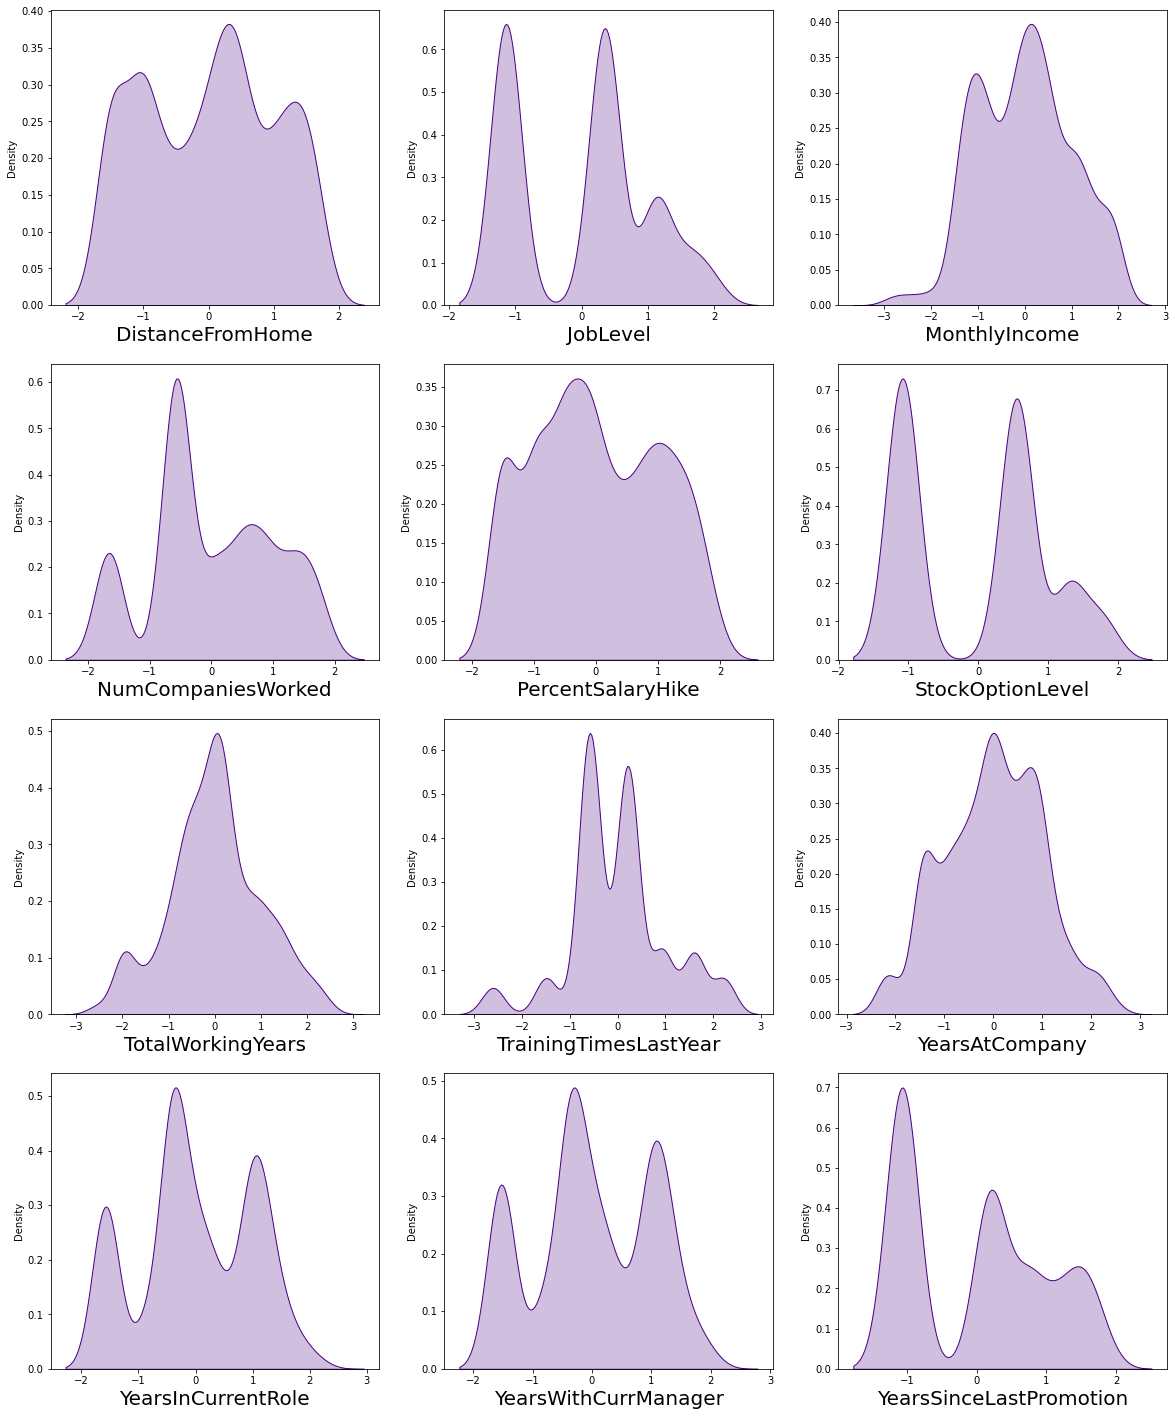

In [114]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks normal

## Encoding the categorical columns using Label Encoding

In [115]:
categorical_col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [116]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [117]:
new_df[categorical_col]

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0             1               2           2               1       0        7   
1             0               1           1               1       1        6   
2             1               2           1               4       1        2   
3             0               1           1               1       0        6   
4             0               2           1               3       1        2   
...         ...             ...         ...             ...     ...      ...   
1465          0               1           1               3       1        2   
1466          0               2           1               3       1        0   
1467          0               2           1               1       1        4   
1468          0               1           2               3       1        7   
1469          0               2           1               3       1        2   

      MaritalStatus  OverTime  
0                 2         1  
1                 1         0  
2                 2         1  
3                 1         1  
4                 1         0  
...             ...       ...  
1465              1         0  
1466              1         0  
1467              1         1  
1468              1         0  
1469              1         0  

[1387 rows x 8 columns]

Columns has now been encoded

## Checking Correlation

In [118]:

# Checking the correlation between features and the target
cor = new_df.corr()
cor

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159366        0.022340   0.021946   
Attrition                -0.159366   1.000000       -0.001041  -0.057220   
BusinessTravel            0.022340  -0.001041        1.000000  -0.004606   
DailyRate                 0.021946  -0.057220       -0.004606   1.000000   
Department               -0.038242   0.063637       -0.003521  -0.005398   
DistanceFromHome         -0.028793   0.080979       -0.015034  -0.003967   
Education                 0.198502  -0.032703       -0.010560  -0.018442   
EducationField           -0.032676   0.023585        0.022576   0.040645   
EnvironmentSatisfaction   0.014098  -0.112393        0.001183   0.033123   
Gender                   -0.039430   0.036252       -0.025364  -0.005242   
HourlyRate                0.025465  -0.001532        0.025424   0.014279   
JobInvolvement            0.036424  -0.133957        0.028261   0.048004   
JobLevel                  0.430414  -0.196464       -0.002398   0.015383   
JobRole                  -0.112957   0.064283        0.000213  -0.015437   
JobSatisfaction           0.011763  -0.114206       -0.032491   0.042698   
MaritalStatus            -0.104372   0.160960        0.018687  -0.074113   
MonthlyIncome             0.436543  -0.207280        0.028387   0.029530   
MonthlyRate               0.026954   0.014888       -0.010307  -0.029844   
NumCompaniesWorked        0.339436   0.047508        0.026929   0.033388   
OverTime                  0.034180   0.257237        0.022378   0.020294   
PercentSalaryHike         0.013248  -0.017523       -0.027934   0.028690   
PerformanceRating        -0.000617   0.010781       -0.018274   0.000574   
RelationshipSatisfaction  0.041744  -0.052344       -0.029660   0.004516   
StockOptionLevel          0.077833  -0.175081       -0.012732   0.047773   
TotalWorkingYears         0.634884  -0.220878        0.031888   0.043307   
TrainingTimesLastYear    -0.013707  -0.059071        0.011688   0.006581   
WorkLifeBalance          -0.016913  -0.062492       -0.014140  -0.044266   
YearsAtCompany            0.174149  -0.201954       -0.021107   0.005806   
YearsInCurrentRole        0.118454  -0.187047       -0.032472   0.020542   
YearsSinceLastPromotion   0.103938  -0.050986       -0.027478  -0.035403   
YearsWithCurrManager      0.114962  -0.186821       -0.033222   0.007098   

                          Department  DistanceFromHome  Education  \
Age                        -0.038242         -0.028793   0.198502   
Attrition                   0.063637          0.080979  -0.032703   
BusinessTravel             -0.003521         -0.015034  -0.010560   
DailyRate                  -0.005398         -0.003967  -0.018442   
Department                  1.000000          0.037660   0.012846   
DistanceFromHome            0.037660          1.000000   0.003595   
Education                   0.012846          0.003595   1.000000   
EducationField              0.013432          0.011891  -0.038017   
EnvironmentSatisfaction    -0.014540         -0.012075  -0.026223   
Gender                     -0.030618          0.010557  -0.019166   
HourlyRate                 -0.002412          0.014926   0.010848   
JobInvolvement             -0.024040          0.036805   0.041343   
JobLevel                    0.203244          0.024038   0.104270   
JobRole                     0.678627          0.009353   0.015140   
JobSatisfaction             0.029521         -0.019334  -0.007219   
MaritalStatus               0.052086         -0.027275  -0.012726   
MonthlyIncome               0.154056          0.000545   0.111594   
MonthlyRate                 0.022741          0.048976  -0.018540   
NumCompaniesWorked         -0.034028         -0.010318   0.137958   
OverTime                    0.014908          0.036524  -0.017166   
PercentSalaryHike          -0.015322          0.034946  -0.002478   
PerformanceRating          -0.039364          0.013212  -0.023487   
Relationshi

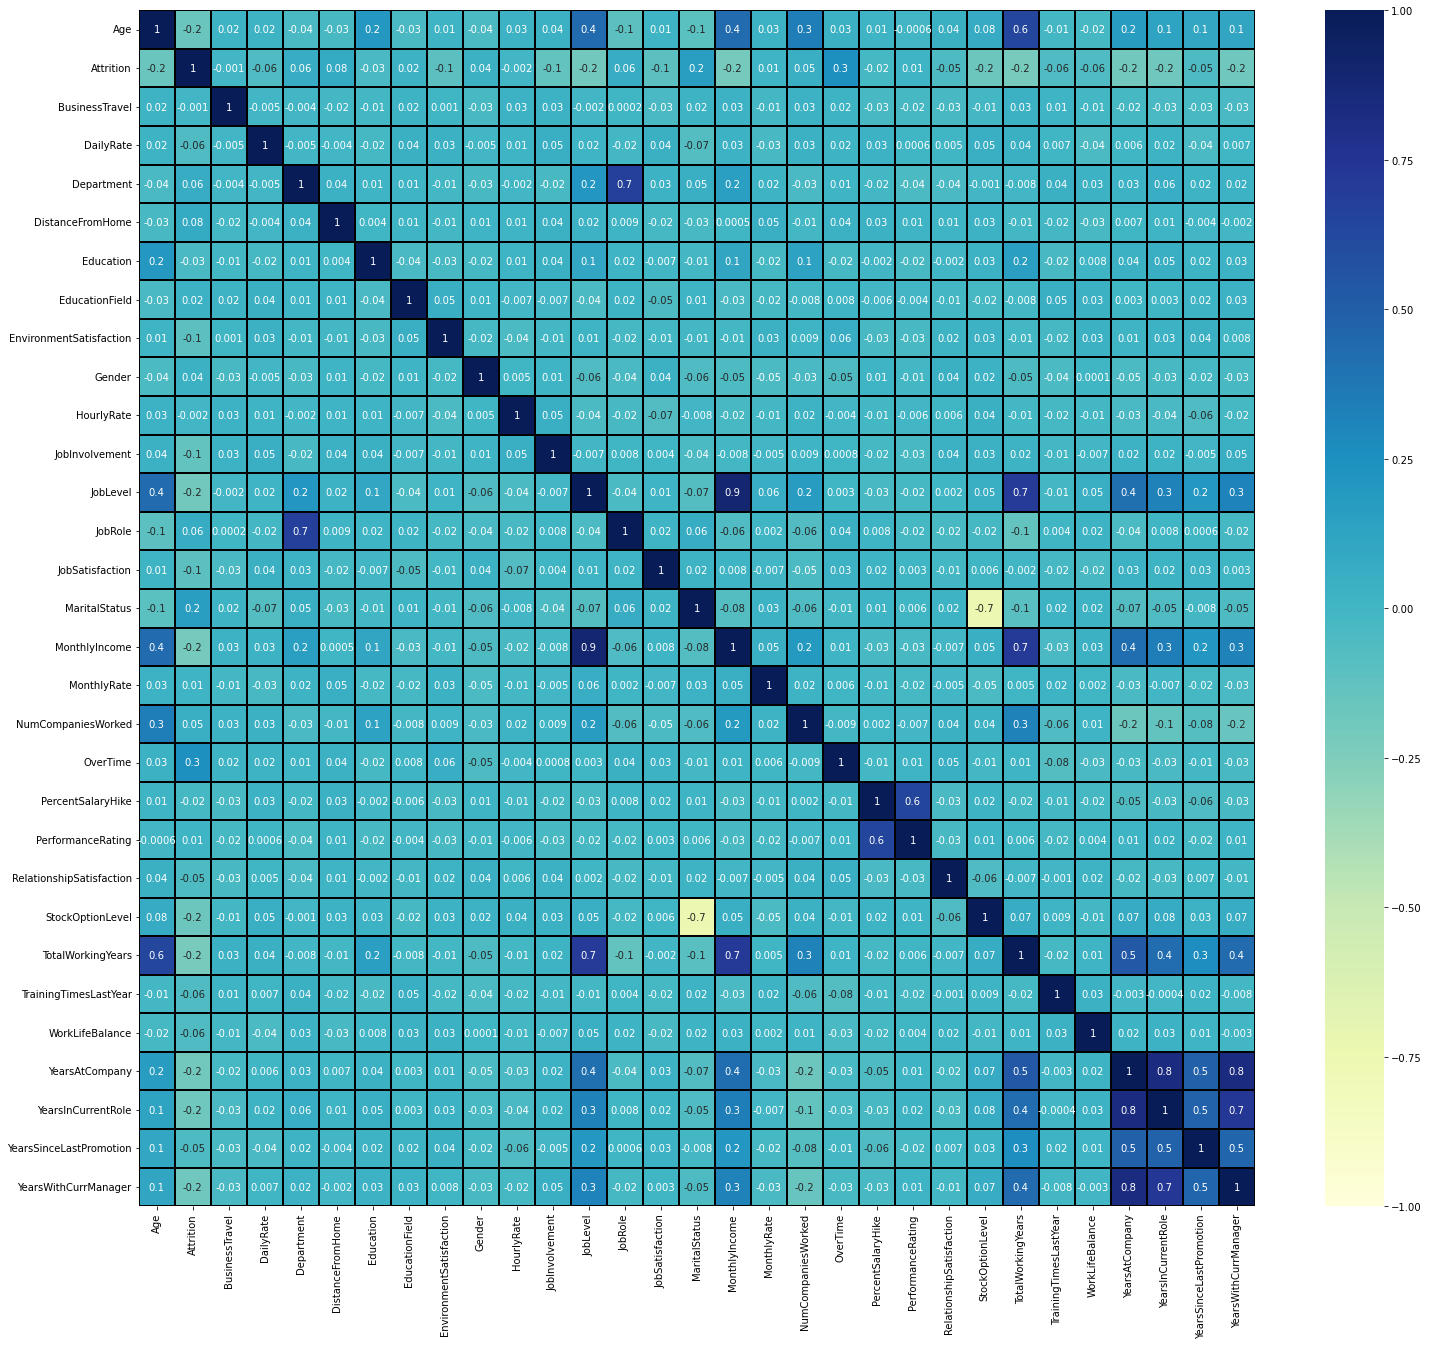

In [119]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat mapcontains both positive and negative correlation. We can notice that the target variable "Attrition" has very less correlation with the feature columns. The columns BussinessTravel and HourlyRate have no relation with the target so we can drop these columns. The only columns StockOptionLevel and MaritalStatus have correlation with each other. Apart from this here is no multicollinearity problem, so no need to worry much.

In [120]:
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.257237
MaritalStatus               0.160960
DistanceFromHome            0.080979
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.047508
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
BusinessTravel             -0.001041
HourlyRate                 -0.001532
PercentSalaryHike          -0.017523
Education                  -0.032703
YearsSinceLastPromotion    -0.050986
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.059071
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
Age                        -0.159366
StockOptionLevel           -0.175081
YearsWithCurrManager       -0.186821
YearsInCurrentRole         -0.187047
J

## Visualizing the correlation between label and features using bar plot

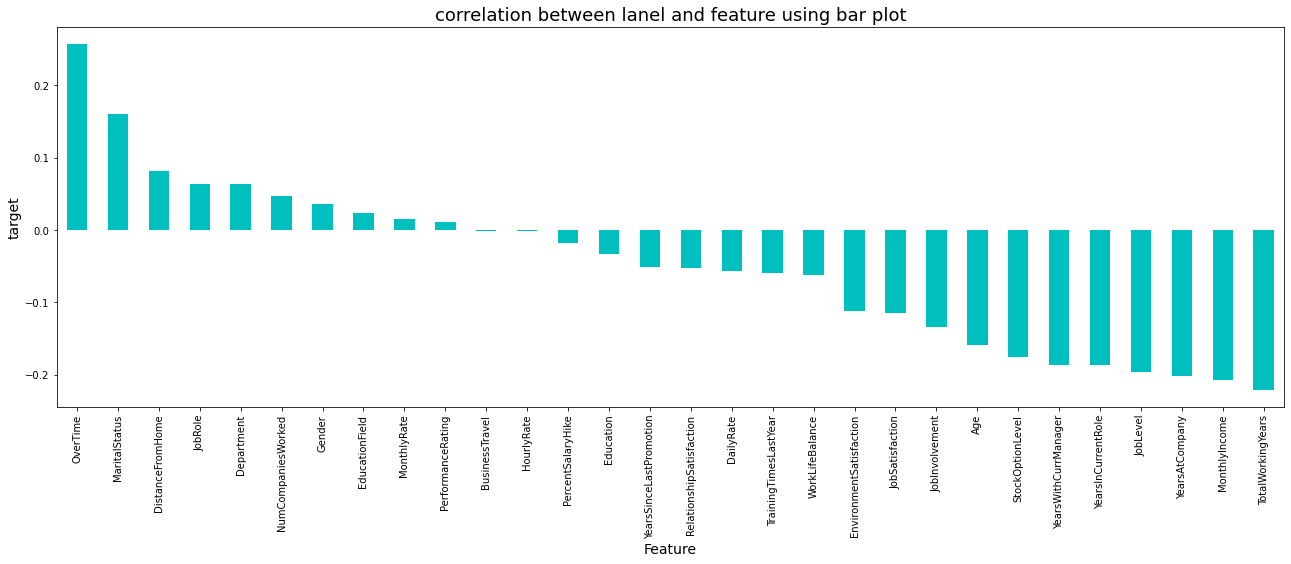

In [121]:
plt.figure(figsize=(22,7))
new_df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Here we can notice the columns BusinessTravel and HourlyRate have very less corrrelation with the target. Lets drop those columns.

In [123]:
# Dropping irrelevant columns
new_df.drop("BusinessTravel",axis=1, inplace=True)
new_df.drop("HourlyRate",axis=1, inplace=True)

In [124]:
new_df.head()

Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0   41          1       1102           2         -1.489968          2   
1   49          0        279           1          0.244561          1   
2   37          1       1373           1         -1.028366          2   
3   33          0       1392           1         -0.698191          4   
4   27          0        591           1         -1.028366          1   

   EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
0               1                        2       0               3  ...   
1               1                        3       1               2  ...   
2               4                        4       1               2  ...   
3               1                        4       0               3  ...   
4               3                        1       1               3  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1         -1.084263   
1                  4                         4          0.548653   
2                  3                         2         -1.084263   
3                  3                         3         -1.084263   
4                  3                         4          0.548653   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.608524                1        0.231837   
1           0.147620               0.217074                3        0.948319   
2          -0.351153               0.217074                3       -2.156089   
3          -0.173231               0.217074                3        0.621429   
4          -0.544046               0.217074                3       -0.933983   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  
2           -1.571814                -1.073534             -1.528426  
3            1.006575                 1.027520             -1.528426  
4           -0.390769                 0.722874             -0.347871  

[5 rows x 29 columns]

This is the dataframe after removing irrelevant columns.

## Splitting the dataset into Features and Target

In [126]:
x = new_df.drop("Attrition", axis=1)
y = new_df["Attrition"]

In [127]:
# Dimension of x
x.shape

(1387, 28)

In [128]:
# Dimension of y
y.shape

(1387,)

In [129]:
x.head()

Age  DailyRate  Department  DistanceFromHome  Education  EducationField  \
0   41       1102           2         -1.489968          2               1   
1   49        279           1          0.244561          1               1   
2   37       1373           1         -1.028366          2               4   
3   33       1392           1         -0.698191          4               1   
4   27        591           1         -1.028366          1               3   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  ...  \
0                        2       0               3  0.349828  ...   
1                        3       1               2  0.349828  ...   
2                        4       1               2 -1.141761  ...   
3                        4       0               3 -1.141761  ...   
4                        1       1               3 -1.141761  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1         -1.084263   
1                  4                         4          0.548653   
2                  3                         2         -1.084263   
3                  3                         3         -1.084263   
4                  3                         4          0.548653   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.608524                1        0.231837   
1           0.147620               0.217074                3        0.948319   
2          -0.351153               0.217074                3       -2.156089   
3          -0.173231               0.217074                3        0.621429   
4          -0.544046               0.217074                3       -0.933983   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  
2           -1.571814                -1.073534             -1.528426  
3            1.006575                 1.027520             -1.528426  
4           -0.390769                 0.722874             -0.347871  

[5 rows x 28 columns]

In [130]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [131]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

## SMOTE

In [132]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [133]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

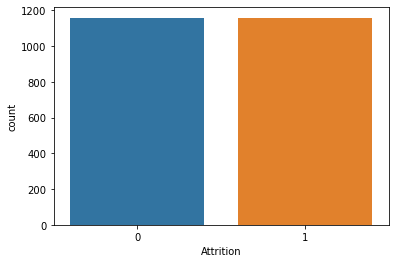

In [134]:
# Visualize the data after balancing
sns.countplot(y)

Since both the attrition levels are equal. It is clear that the data is balanced.

## Feature Scaling

In [135]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Age  DailyRate  Department  DistanceFromHome  Education  \
0     0.734353   0.811796    1.618906         -1.658097  -0.762167   
1     1.671477  -1.294340   -0.323781          0.181843  -1.795644   
2     0.265792   1.505311   -0.323781         -1.168442  -0.762167   
3    -0.202770   1.553934   -0.323781         -0.818202   1.304787   
4    -0.905613  -0.495902   -0.323781         -1.168442  -1.795644   
...        ...        ...         ...               ...        ...   
2311 -1.608456  -0.091565   -0.323781         -1.578893  -1.795644   
2312  0.734353  -0.849058   -0.323781         -1.168442  -1.795644   
2313 -0.671332   0.468877    1.618906          0.229912   0.271310   
2314 -0.319911  -0.859294   -2.266469         -0.837475  -0.762167   
2315 -1.608456  -1.568164   -0.323781          0.605329  -0.762167   

      EducationField  EnvironmentSatisfaction    Gender  JobInvolvement  \
0          -0.904667                -0.428166 -1.037849        0.638201   
1          -0.904667                 0.501199  0.963532       -0.720323   
2           1.458351                 1.430565  0.963532       -0.720323   
3          -0.904667                 1.430565 -1.037849        0.638201   
4           0.670678                -1.357532  0.963532        0.638201   
...              ...                      ...       ...             ...   
2311        1.458351                -1.357532 -1.037849       -0.720323   
2312       -0.904667                -1.357532 -1.037849        0.638201   
2313        0.670678                -1.357532  0.963532        0.638201   
2314       -1.692340                -1.357532 -1.037849        0.638201   
2315       -0.904667                -0.428166 -1.037849        0.638201   

      JobLevel  ...  PerformanceRating  RelationshipSatisfaction  \
0     0.570756  ...          -0.337635                 -1.428238   
1     0.570756  ...           2.961782                  1.425773   
2    -1.009687  ...          -0.337635                 -0.476901   
3    -1.009687  ...          -0.337635                  0.474436   
4    -1.009687  ...          -0.337635                  1.425773   
...        ...  ...                ...                       ...   
2311 -1.009687  ...          -0.337635                  0.474436   
2312 -0.401068  ...          -0.337635                 -1.428238   
2313 -1.009687  ...          -0.337635                  0.474436   
2314 -1.009687  ...          -0.337635                 -1.428238   
2315 -1.009687  ...          -0.337635                  0.474436   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.967307           0.027453              -2.703773   
1             0.754962           0.355734               0.295736   
2            -0.967307          -0.154589               0.295736   
3            -0.967307           0.027453               0.295736   
4             0.754962          -0.351948               0.295736   
...                ...                ...                    ...   
2311         -0.804894          -1.015161               0.434867   
2312         -0.967307           0.730549               0.295736   
2313         -0.894564          -1.758130               0.295736   
2314         -0.967307           0.465853               0.406600   
2315         -0.967307          -1.740756              -2.330617   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.150778        0.424609            0.477005   
1            0.542491        1.172116            1.233886   
2            0.542491       -2.066719           -1.491526   
3            0.542491        0.831071            1.233886   
4            0.542491       -0.791694           -0.243137   
...               ...             ...                 ...   
2311         0.542491       -0.440398           -0.243137   
2312         0.542491        1.008260            1.233886   
2313        -0.804143       -1.260620           -1.438798   
2314         0.542491    

The Data has been scaled now

We have seen that there is no multi colinearity, however lets still check the VIF

# VIF Factor

In [136]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values                  Features
0     1.918501                       Age
1     1.050782                 DailyRate
2     2.009285                Department
3     1.045173          DistanceFromHome
4     1.078613                 Education
5     1.048150            EducationField
6     1.070634   EnvironmentSatisfaction
7     1.056679                    Gender
8     1.086596            JobInvolvement
9     5.841017                  JobLevel
10    1.830387                   JobRole
11    1.070362           JobSatisfaction
12    2.109111             MaritalStatus
13    5.843074             MonthlyIncome
14    1.053973               MonthlyRate
15    1.422360        NumCompaniesWorked
16    1.035666                  OverTime
17    1.487849         PercentSalaryHike
18    1.483273         PerformanceRating
19    1.065569  RelationshipSatisfaction
20    2.105886          StockOptionLevel
21    4.398771         TotalWorkingYears
22    1.028777     TrainingTimesLastYear
23    1.056696           WorkLifeBalance
24    7.038980            YearsAtCompany
25    3.994662        YearsInCurrentRole
26    1.456309   YearsSinceLastPromotion
27    3.772468      YearsWithCurrManager

None of the columns have the VIF value above 10 which means there is no multicollinearity issue.

In [137]:
# DataFrame after preprocessing and data cleaning
new_df.head()

Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0   41          1       1102           2         -1.489968          2   
1   49          0        279           1          0.244561          1   
2   37          1       1373           1         -1.028366          2   
3   33          0       1392           1         -0.698191          4   
4   27          0        591           1         -1.028366          1   

   EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  ...  \
0               1                        2       0               3  ...   
1               1                        3       1               2  ...   
2               4                        4       1               2  ...   
3               1                        4       0               3  ...   
4               3                        1       1               3  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1         -1.084263   
1                  4                         4          0.548653   
2                  3                         2         -1.084263   
3                  3                         3         -1.084263   
4                  3                         4          0.548653   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.608524                1        0.231837   
1           0.147620               0.217074                3        0.948319   
2          -0.351153               0.217074                3       -2.156089   
3          -0.173231               0.217074                3        0.621429   
4          -0.544046               0.217074                3       -0.933983   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  
2           -1.571814                -1.073534             -1.528426  
3            1.006575                 1.027520             -1.528426  
4           -0.390769                 0.722874             -0.347871  

[5 rows x 29 columns]

We have done with the preprocessing and data cleaning. Now let's move to build the model.

# Machine Learning

### Since the y (Target) has Categorical values its a classification problem

## Finding Best Random State

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
LR = LogisticRegression()
DTC = DecisionTreeClassifier()

In [149]:
maxAccu = 0   # maximum accuracy
maxRS = 0     # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state       ', maxRS)

accuracy 0.8426724137931034 random_state 1
accuracy 0.8426724137931034 random_state        1
accuracy 0.8232758620689655 random_state 2
accuracy 0.8038793103448276 random_state 3
accuracy 0.8426724137931034 random_state 4
accuracy 0.834051724137931 random_state 5
accuracy 0.8168103448275862 random_state 6
accuracy 0.8211206896551724 random_state 7
accuracy 0.8125 random_state 8
accuracy 0.834051724137931 random_state 9
accuracy 0.8383620689655172 random_state 10
accuracy 0.8254310344827587 random_state 11
accuracy 0.8448275862068966 random_state 12
accuracy 0.8448275862068966 random_state        12
accuracy 0.8060344827586207 random_state 13
accuracy 0.8060344827586207 random_state 14
accuracy 0.8405172413793104 random_state 15
accuracy 0.8125 random_state 16
accuracy 0.8232758620689655 random_state 17
accuracy 0.7974137931034483 random_state 18
accuracy 0.8254310344827587 random_state 19
accuracy 0.8038793103448276 random_state 20
accuracy 0.8081896551724138 random_state 21
accuracy 0

accuracy 0.8189655172413793 random_state 183
accuracy 0.8189655172413793 random_state 184
accuracy 0.8232758620689655 random_state 185
accuracy 0.8275862068965517 random_state 186
accuracy 0.834051724137931 random_state 187
accuracy 0.834051724137931 random_state 188
accuracy 0.7844827586206896 random_state 189
accuracy 0.8038793103448276 random_state 190
accuracy 0.8297413793103449 random_state 191
accuracy 0.8125 random_state 192
accuracy 0.8103448275862069 random_state 193
accuracy 0.8448275862068966 random_state 194
accuracy 0.8275862068965517 random_state 195
accuracy 0.8362068965517241 random_state 196
accuracy 0.8448275862068966 random_state 197
accuracy 0.8254310344827587 random_state 198
accuracy 0.8362068965517241 random_state 199


In [150]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8771551724137931  on Random_state  178


We used both Logistic Regression and Decision Tree classifier for finding the best random state and found that Random_state  178 of Decision Tree classifier gives highest accuracy score 

Hence proceeding with Random state 178

In [151]:
# Importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [161]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=178)  # random_state 11 was the best random_state
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

### Logistic Regression

In [162]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 82.54310344827587

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       221
           1       0.84      0.83      0.83       243

    accuracy                           0.83       464
   macro avg       0.82      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464

Cross Validation Score: 80.61852982795858

Accuracy Score - Cross Validation Score is 1.9245736203172896


## Gaussian Naive Bayes

In [163]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 76.72413793103449

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       221
           1       0.76      0.80      0.78       243

    accuracy                           0.77       464
   macro avg       0.77      0.77      0.77       464
weighted avg       0.77      0.77      0.77       464

Cross Validation Score: 74.61653757354586

Accuracy Score - Cross Validation Score is 2.1076003574886357


### SVC Classifier

In [164]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 87.28448275862068

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       221
           1       0.89      0.86      0.88       243

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464

Cross Validation Score: 85.5006702912043

Accuracy Score - Cross Validation Score is 1.7838124674163822


In [165]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 82.32758620689656

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       221
           1       0.84      0.81      0.83       243

    accuracy                           0.82       464
   macro avg       0.82      0.82      0.82       464
weighted avg       0.82      0.82      0.82       464

Cross Validation Score: 80.27314366574811

Accuracy Score - Cross Validation Score is 2.054442541148447


In [166]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 87.93103448275862

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       221
           1       0.85      0.94      0.89       243

    accuracy                           0.88       464
   macro avg       0.89      0.88      0.88       464
weighted avg       0.88      0.88      0.88       464

Cross Validation Score: 86.01372235048782

Accuracy Score - Cross Validation Score is 1.9173121322707942


### Decision Tree Classifier

In [167]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 86.20689655172413

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       221
           1       0.87      0.87      0.87       243

    accuracy                           0.86       464
   macro avg       0.86      0.86      0.86       464
weighted avg       0.86      0.86      0.86       464

Cross Validation Score: 82.26260519848067

Accuracy Score - Cross Validation Score is 3.9442913532434574


In [175]:
model = DecisionTreeClassifier(random_state=178)
classifier(model, x, y)

Accuracy Score: 87.06896551724138

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       221
           1       0.88      0.88      0.88       243

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464

Cross Validation Score: 82.56479481641469

Accuracy Score - Cross Validation Score is 4.504170700826691


### KNeighbors Classifier

In [168]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 83.1896551724138

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       221
           1       0.76      1.00      0.86       243

    accuracy                           0.83       464
   macro avg       0.88      0.82      0.82       464
weighted avg       0.87      0.83      0.83       464

Cross Validation Score: 83.03139197140091

Accuracy Score - Cross Validation Score is 0.15826320101288616


### SGD Classifier

In [169]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 79.09482758620689

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.77       221
           1       0.79      0.82      0.80       243

    accuracy                           0.79       464
   macro avg       0.79      0.79      0.79       464
weighted avg       0.79      0.79      0.79       464

Cross Validation Score: 77.33652342295375

Accuracy Score - Cross Validation Score is 1.7583041632531433


### Random Forest Classifier

In [170]:
model = RandomForestClassifier(random_state=178)
classifier(model, x, y)

Accuracy Score: 89.87068965517241

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       221
           1       0.97      0.83      0.90       243

    accuracy                           0.90       464
   macro avg       0.91      0.90      0.90       464
weighted avg       0.91      0.90      0.90       464

Cross Validation Score: 89.3037350115439

Accuracy Score - Cross Validation Score is 0.566954643628506


In [171]:
model = RandomForestClassifier()
classifier(model, x, y)

Accuracy Score: 90.51724137931035

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       221
           1       0.96      0.85      0.90       243

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464

Cross Validation Score: 89.30308333953974

Accuracy Score - Cross Validation Score is 1.2141580397706093


### ExtraTrees Classifier

In [172]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 92.02586206896551

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       221
           1       0.95      0.90      0.92       243

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464

Cross Validation Score: 91.1121248231176

Accuracy Score - Cross Validation Score is 0.913737245847912


### AdaBoost Classifier

In [173]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 88.14655172413794

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       221
           1       0.90      0.87      0.88       243

    accuracy                           0.88       464
   macro avg       0.88      0.88      0.88       464
weighted avg       0.88      0.88      0.88       464

Cross Validation Score: 84.72741491025545

Accuracy Score - Cross Validation Score is 3.4191368138824885


### Gradient Boosting Classifier

In [174]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 90.94827586206897

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       221
           1       0.97      0.86      0.91       243

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.92      0.91      0.91       464

Cross Validation Score: 87.53546957622702

Accuracy Score - Cross Validation Score is 3.4128062858419526


Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

# Hyper Parameter Tuning

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=178)

In [181]:
# ExtraTreesClassifier?

In [182]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15],
              'random_state' : [None, 178]}

In [183]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [184]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15], 'random_state': [None, 178]})

In [185]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_jobs': 10,
 'random_state': None}

We got the best parameters using Gridsearch CV

In [186]:
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'log2', n_jobs = 10, random_state = None)   # final model with best parameters

In [187]:
final_fitc = final_modelc.fit(x_train,y_train)   # final fit

In [188]:
final_predc = final_modelc.predict(x_test)   # predicting with best parameters

In [189]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  92.67241379310344


We successfully performed the Hyper Parameter Tuning on the Final Model.

In [191]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 91.62983168243093


We got final accuracy score of 92.6724% and Cross Validation Score of 91.6298% which is good

In [192]:
x_test.shape

(464, 28)

In [193]:
y_test.shape

(464,)

In [194]:
x_train.shape

(1852, 28)

In [195]:
y_train.shape

(1852,)

In [200]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       221
           1       0.95      0.91      0.93       243

    accuracy                           0.93       464
   macro avg       0.93      0.93      0.93       464
weighted avg       0.93      0.93      0.93       464



# AUC ROC curve

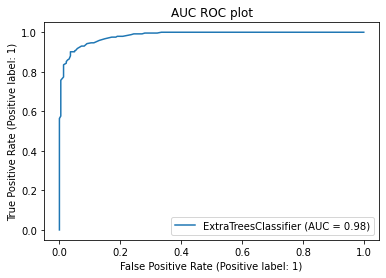

In [202]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

We got final accuracy score of 92.6724% and Cross Validation Score of 91.6298% and also AUC score is 98% which is really good.

# Saving the model in pickle Format

In [196]:
# pickeling or serialization of a file
import pickle
filename = 'HR_Analytics_Project_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

# Prediction Conclusion:

In [197]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_modelc.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

original  predicted
0           0          0
1           1          1
2           1          1
3           0          1
4           0          0
..        ...        ...
459         1          1
460         1          1
461         1          1
462         0          0
463         1          1

[464 rows x 2 columns]

Hence predicted the "Attrition" using the final Model.

Saving the comparison file as a csv file.

In [198]:
df_comparison.to_csv('HR_Analytics_Project_Prediction.csv')

Saved the file as a csv.